In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as colors

sns.set()
sns.set_style("whitegrid")

out_file_path = "./"
ncu_file_path = "../data/"

In [17]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        "trunc({n},{a:.2f},{b:.2f})".format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)),
    )
    return new_cmap


cmap_64 = plt.get_cmap("Blues")
cmap_64 = truncate_colormap(cmap_64, 0.3, 0.9)
cmap_32 = plt.get_cmap("Oranges")
cmap_32 = truncate_colormap(cmap_32, 0.3, 0.9)
cmap_16 = plt.get_cmap("Greens")
cmap_16 = truncate_colormap(cmap_16, 0.3, 0.9)


In [18]:
cu_data = pd.read_csv(
    "../data/cufft-4090-3d-clean.csv",
    header=None,
    names=["pro", "pres", "n", "time", "GFlops", "x", "y", "z"])

# cu_data["GFlops"] = 5 * cu_data["n"] * np.log2(cu_data["n"]) / cu_data["time"]
# cu_data[cu_data["pro"] == "2d"]["GFlops"] = cu_data[cu_data["pro"] == "2d"]["n"] * cu_data[cu_data["pro"] == "2d"]["n"] * np.log2(cu_data[cu_data["pro"] == "2d"]["n"]) / cu_data[cu_data["pro"] == "2d"]["time"]
# cu_data[cu_data["pro"] == "3d"]["GFlops"] = cu_data[cu_data["pro"] == "3d"]["n"] * cu_data[cu_data["pro"] == "3d"]["n"] * np.log2(cu_data[cu_data["pro"] == "3d"]["n"]) * np.log2(cu_data[cu_data["pro"] == "3d"]["n"]) / cu_data[cu_data["pro"] == "3d"]["time"]

print(cu_data)
cu_data["GFlops"] = cu_data["GFlops"] / 1000
# cu_data.to_csv("./cu_data.csv", sep=',')


      pro  pres                    n      time        GFlops        x  \
0      1d    16                    2  0.001843  5.425000e-03        2   
1      1d    32                    2  0.001838  5.440000e-03        2   
2      1d    64                    2  0.001893  5.283000e-03        2   
3      1d    16                    4  0.002048  1.953100e-02        4   
4      1d    32                    4  0.001894  2.111500e-02        4   
...    ..   ...                  ...       ...           ...      ...   
12591  3d    32  4611686018427387904  0.000768  1.861488e+18  1048576   
12592  3d    32  2305843009213693952  0.000768  9.157320e+17  1048576   
12593  3d    32  4611686018427387904  0.000768  1.861488e+18  1048576   
12594  3d    32  2305843009213693952  0.001178  5.972165e+17  1048576   
12595  3d    32  4611686018427387904  0.000768  1.861488e+18  1048576   

                y         z  
0             NaN       NaN  
1             NaN       NaN  
2             NaN       NaN  
3  

In [19]:
pro_info = cu_data["pres"].unique()
print(pro_info)


[16 32 64]


In [20]:
for diff_pro in pro_info:
    temp_data = cu_data[cu_data["pres"].isin([diff_pro])]
    exec("cufft_%s=temp_data.copy()" % diff_pro)

for diff_pro in pro_info:
    print(eval("cufft_" + str(diff_pro)))
    print(
        "------------------------------------------------------------------------------------------------------"
    )

      pro  pres           n       time    GFlops        x      y    z
0      1d    16           2   0.001843  0.000005        2    NaN  NaN
3      1d    16           4   0.002048  0.000020        4    NaN  NaN
6      1d    16           8   0.001958  0.000061        8    NaN  NaN
9      1d    16          16   0.002048  0.000156       16    NaN  NaN
12     1d    16          32   0.002155  0.000371       32    NaN  NaN
...    ..   ...         ...        ...       ...      ...    ...  ...
12562  3d    16   536870912  25.753599  3.022734  1048576  128.0  4.0
12564  3d    16  1073741824  48.230465  3.339410  1048576  128.0  8.0
12565  3d    16   536870912  24.164352  3.221534  1048576  256.0  2.0
12567  3d    16  1073741824  48.270336  3.336651  1048576  256.0  4.0
12568  3d    16  1073741824  48.305153  3.334246  1048576  512.0  2.0

[4401 rows x 8 columns]
------------------------------------------------------------------------------------------------------
      pro  pres                 

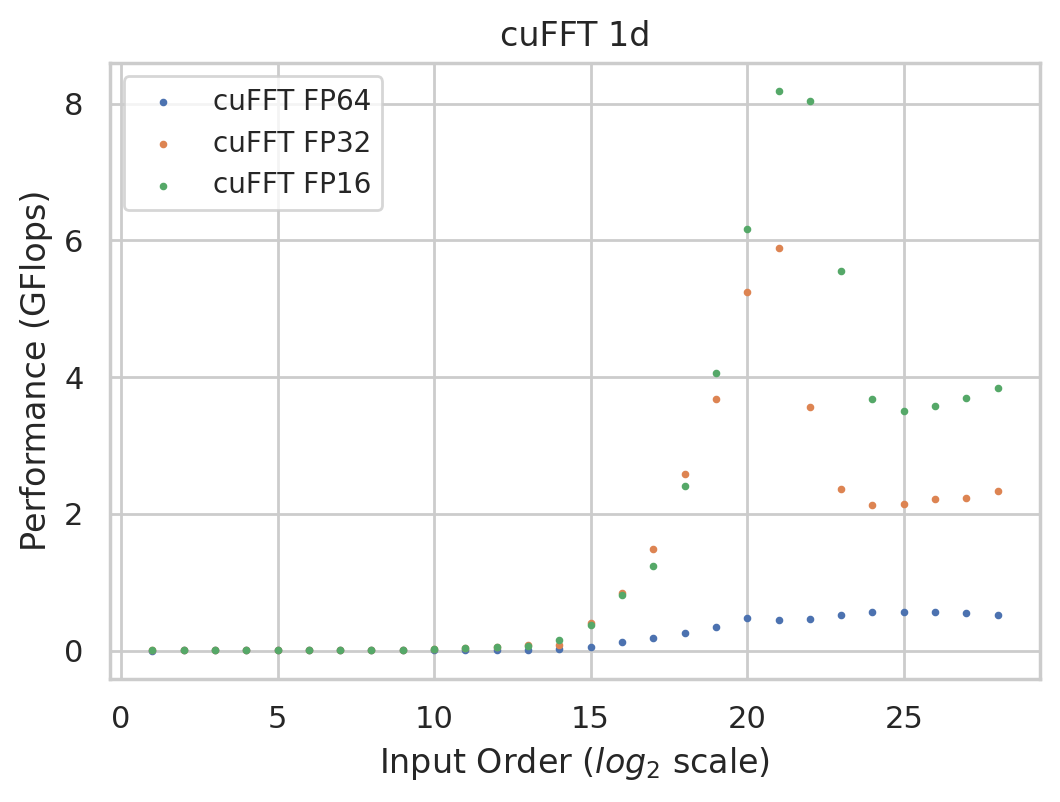

In [21]:
plt.figure(figsize=(6, 4), dpi=200)

dot_size = 3
legend_font_size = 10

plt.scatter(
    np.log2(cufft_64[cufft_64["pro"] == "1d"]["n"]),
    (cufft_64[cufft_64["pro"] == "1d"]["GFlops"]),
    label="cuFFT FP64",
    s=dot_size,
)

plt.scatter(
    np.log2(cufft_32[cufft_32["pro"] == "1d"]["n"]),
    (cufft_32[cufft_32["pro"] == "1d"]["GFlops"]),
    label="cuFFT FP32",
    s=dot_size,
)

plt.scatter(
    np.log2(cufft_16[cufft_16["pro"] == "1d"]["n"]),
    (cufft_16[cufft_16["pro"] == "1d"]["GFlops"]),
    label="cuFFT FP16",
    s=dot_size,
)

plt.legend(loc=2, fontsize=legend_font_size)

plt.title("cuFFT 1d")
plt.ylabel("Performance (GFlops)")
plt.xlabel("Input Order ($log_2$ scale)")

plt.show()

[2, 4, 16]


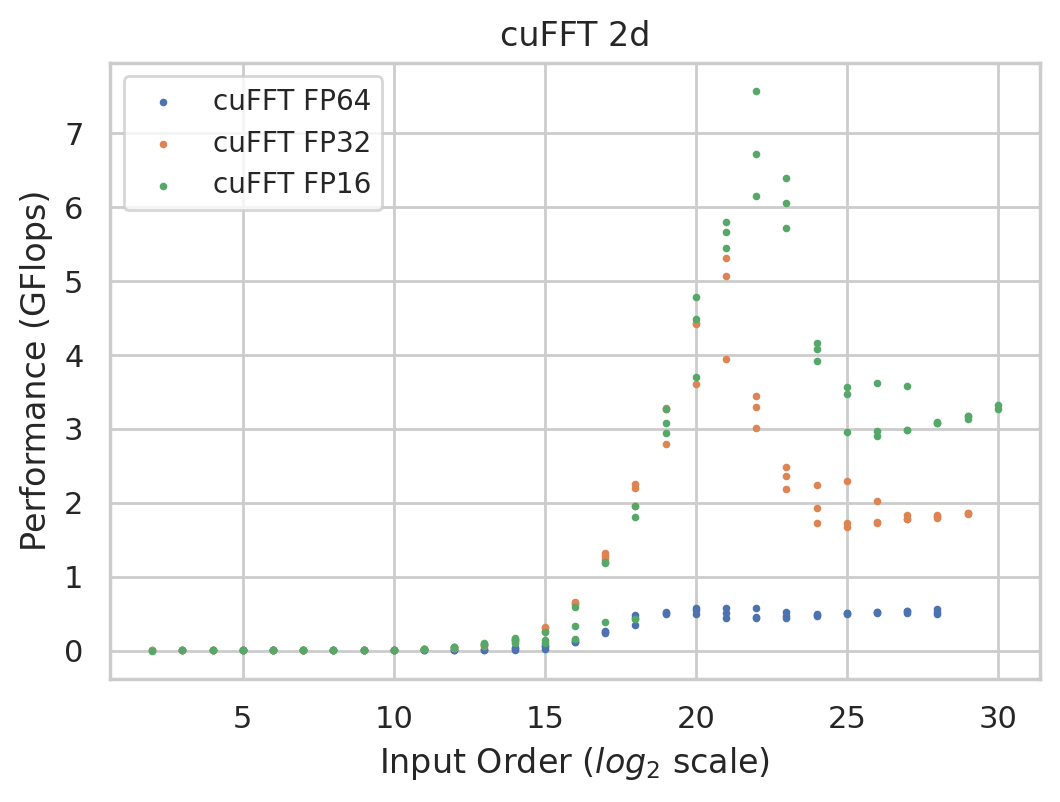

In [22]:
plt.figure(figsize=(6, 4), dpi=200)

dot_size = 3
legend_font_size = 10

# mask_2d = np.logspace(0,3,4,base=4)
mask_2d = [2, 4, 16]
print(mask_2d)

plt_2d_64 = cufft_64[cufft_64["pro"] == "2d"][cufft_64[cufft_64["pro"] == "2d"]
                                              ["y"].isin(mask_2d)]
plt_2d_32 = cufft_32[cufft_32["pro"] == "2d"][cufft_32[cufft_32["pro"] == "2d"]
                                              ["y"].isin(mask_2d)]
plt_2d_16 = cufft_16[cufft_16["pro"] == "2d"][cufft_16[cufft_16["pro"] == "2d"]
                                              ["y"].isin(mask_2d)]

plt.scatter(
    np.log2(plt_2d_64["n"]),
    (plt_2d_64["GFlops"]),
    label="cuFFT FP64",
    s=dot_size,
)

plt.scatter(
    np.log2(plt_2d_32["n"]),
    (plt_2d_32["GFlops"]),
    label="cuFFT FP32",
    s=dot_size,
)

plt.scatter(
    np.log2(plt_2d_16["n"]),
    (plt_2d_16["GFlops"]),
    label="cuFFT FP16",
    s=dot_size,
)

plt.legend(loc=2, fontsize=legend_font_size)

plt.title("cuFFT 2d")
plt.ylabel("Performance (GFlops)")
plt.xlabel("Input Order ($log_2$ scale)")

plt.show()

[2, 4, 16]


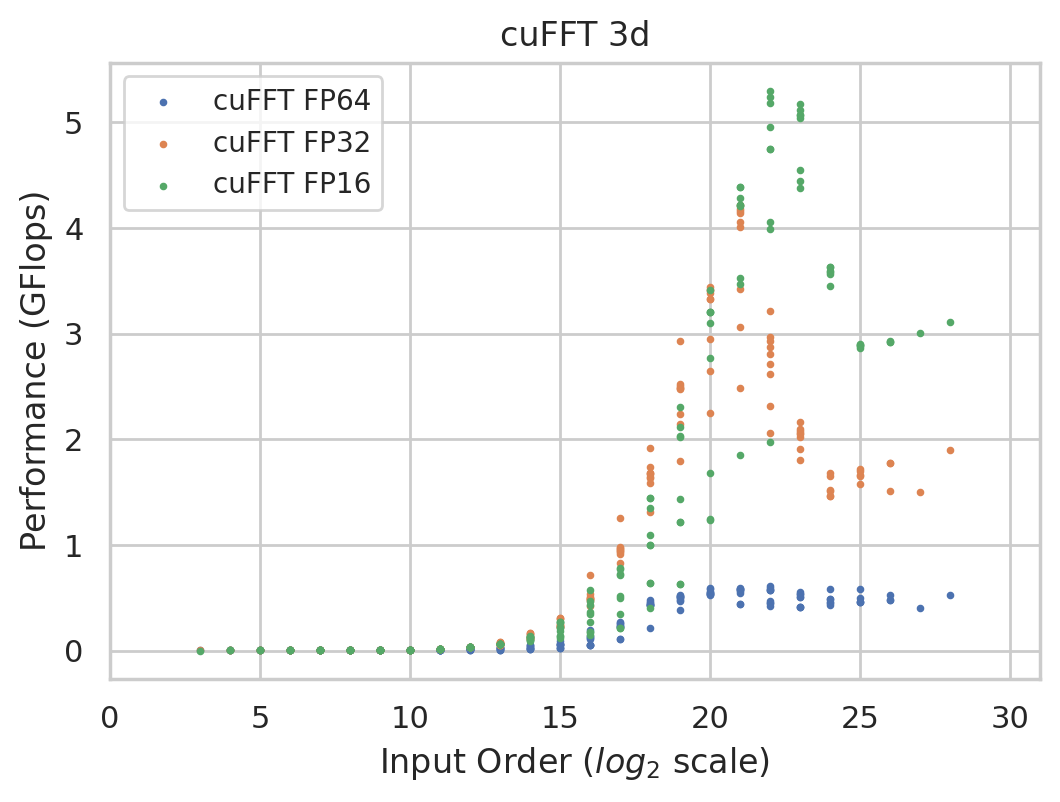

In [23]:
plt.figure(figsize=(6, 4), dpi=200)

dot_size = 3
legend_font_size = 10

mask_3d = [2, 4, 16]
print(mask_3d)

plt_3d_64 = cufft_64[cufft_64["pro"] == "3d"][cufft_64[cufft_64["pro"] == "3d"]
                                              ["z"].isin(mask_3d)]
plt_3d_32 = cufft_32[cufft_32["pro"] == "3d"][cufft_32[cufft_32["pro"] == "3d"]
                                              ["z"].isin(mask_3d)]
plt_3d_16 = cufft_16[cufft_16["pro"] == "3d"][cufft_16[cufft_16["pro"] == "3d"]
                                              ["z"].isin(mask_3d)]

plt_3d_64 = plt_3d_64[plt_3d_64["y"].isin(mask_3d)]
plt_3d_32 = plt_3d_32[plt_3d_32["y"].isin(mask_3d)]
plt_3d_16 = plt_3d_16[plt_3d_16["y"].isin(mask_3d)]

plt.scatter(
    np.log2(plt_3d_64["n"]),
    (plt_3d_64["GFlops"]),
    label="cuFFT FP64",
    s=dot_size,
)

plt.scatter(
    np.log2(plt_3d_32["n"]),
    (plt_3d_32["GFlops"]),
    label="cuFFT FP32",
    s=dot_size,
)

plt.scatter(
    np.log2(plt_3d_16["n"]),
    (plt_3d_16["GFlops"]),
    label="cuFFT FP16",
    s=dot_size,
)

plt.legend(loc=2, fontsize=legend_font_size)
plt.xlim(0, 31)
# plt.ylim(-500, 10000)
plt.title("cuFFT 3d")
plt.ylabel("Performance (GFlops)")
plt.xlabel("Input Order ($log_2$ scale)")

plt.show()

## ncu script generation

In [24]:
ncu_pre = "ncu -o test -f --set full --section MemoryWorkloadAnalysis_Tables --page details --csv "
ncu_app = " | grep -e 'L1/TEX Hit Rate' -e 'L2 Hit Rate' | tr -d '\\n' \necho ''"

In [25]:
csv_1d = pd.concat(
    [cufft_64[cufft_64["pro"] == "1d"], cufft_32[cufft_32["pro"] == "1d"]])
csv_1d = pd.concat([csv_1d, cufft_16[cufft_16["pro"] == "1d"]])

csv_1d = csv_1d.loc[:, ["pro", "pres", "x"]]
csv_1d["pro"] = "echo -n " + "\'" + np.log2(
    csv_1d["x"]).astype('int').astype('str') + ",,," + "\'\n"
csv_1d["pres"] = ncu_pre + "./cufft_" + csv_1d["pres"].astype('str')
csv_1d["x"] = np.log2(csv_1d["x"]).astype('int').astype('str') + ncu_app

# csv_1d.to_csv("./cufft_1d.sh", sep=' ', index=False, header=False)
print(csv_1d)

                  pro                                               pres  \
2    echo -n '1,,,'\n  ncu -o test -f --set full --section MemoryWork...   
5    echo -n '2,,,'\n  ncu -o test -f --set full --section MemoryWork...   
8    echo -n '3,,,'\n  ncu -o test -f --set full --section MemoryWork...   
11   echo -n '4,,,'\n  ncu -o test -f --set full --section MemoryWork...   
14   echo -n '5,,,'\n  ncu -o test -f --set full --section MemoryWork...   
..                ...                                                ...   
69  echo -n '24,,,'\n  ncu -o test -f --set full --section MemoryWork...   
72  echo -n '25,,,'\n  ncu -o test -f --set full --section MemoryWork...   
75  echo -n '26,,,'\n  ncu -o test -f --set full --section MemoryWork...   
78  echo -n '27,,,'\n  ncu -o test -f --set full --section MemoryWork...   
81  echo -n '28,,,'\n  ncu -o test -f --set full --section MemoryWork...   

                                                    x  
2   1 | grep -e 'L1/TEX Hit Rat

In [26]:
csv_2d = pd.concat([plt_2d_64, plt_2d_32])
csv_2d = pd.concat([csv_2d, plt_2d_16])

csv_2d = csv_2d.loc[:, ["pro", "pres", "x", "y"]]
csv_2d["pro"] = "echo -n " + "\'" + np.log2(
    csv_2d["x"]).astype('int').astype('str') + "," + np.log2(
        csv_2d["y"]).astype('int').astype('str') + ",," + "\'\n"
csv_2d["pres"] = ncu_pre + "./cufft_2d_" + csv_2d["pres"].astype('str')
csv_2d["x"] = np.log2(csv_2d["x"]).astype('int')
csv_2d["y"] = np.log2(csv_2d["y"]).astype('int').astype('str') + ncu_app
# csv_2d.to_csv("./cufft_2d.sh", sep=' ', index=False, header=False)

In [27]:
csv_3d = pd.concat([plt_3d_64, plt_3d_32])
csv_3d = pd.concat([csv_3d, plt_3d_16])

csv_3d = csv_3d.loc[:, ["pro", "pres", "x", "y", "z"]]
csv_3d["pro"] = "echo -n " + "\'" + np.log2(
    csv_3d["x"]).astype('int').astype('str') + "," + np.log2(
        csv_3d["y"]).astype('int').astype('str') + "," + np.log2(
            csv_3d["z"]).astype('int').astype('str') + "," + "\'\n"
csv_3d["pres"] = ncu_pre + "./cufft_3d_" + csv_3d["pres"].astype('str')
csv_3d["x"] = np.log2(csv_3d["x"]).astype('int')
csv_3d["y"] = np.log2(csv_3d["y"]).astype('int')
csv_3d["z"] = np.log2(csv_3d["z"]).astype('int').astype('str') + ncu_app
# csv_3d.to_csv("./cufft_3d.sh", sep=' ', index=False, header=False)
print(csv_3d)


                       pro                                               pres  \
1303    echo -n '1,1,1,'\n  ncu -o test -f --set full --section MemoryWork...   
1306    echo -n '1,1,2,'\n  ncu -o test -f --set full --section MemoryWork...   
1312    echo -n '1,1,4,'\n  ncu -o test -f --set full --section MemoryWork...   
1384    echo -n '1,2,1,'\n  ncu -o test -f --set full --section MemoryWork...   
1387    echo -n '1,2,2,'\n  ncu -o test -f --set full --section MemoryWork...   
...                    ...                                                ...   
12487  echo -n '20,2,2,'\n  ncu -o test -f --set full --section MemoryWork...   
12493  echo -n '20,2,4,'\n  ncu -o test -f --set full --section MemoryWork...   
12523  echo -n '20,4,1,'\n  ncu -o test -f --set full --section MemoryWork...   
12526  echo -n '20,4,2,'\n  ncu -o test -f --set full --section MemoryWork...   
12532  echo -n '20,4,4,'\n  ncu -o test -f --set full --section MemoryWork...   

        x  y               

## ncu Cache Analysis

In [28]:
import re

regex_L1 = '(?<="L1/TEX Hit Rate","%",").[.0-9_]*'
regex_L2 = '(?<=L2 Hit Rate","%",").[.0-9_]*'


In [29]:
cufft_1d_L1 = []
cufft_1d_L2 = []

fileHandler = open(ncu_file_path + "ncu-cufft-1d-4090.csv", "r")

while True:
    line = fileHandler.readline()
    if not line:
        break

    str_select = re.findall(regex_L1, line)
    num_list_new = [float(i) for i in str_select]
    cufft_1d_L1.append(np.mean(num_list_new))

    str_select = re.findall(regex_L2, line)
    num_list_new = [float(i) for i in str_select]
    cufft_1d_L2.append(np.mean(num_list_new))

fileHandler.close()

# print(cufft_1d_L1)
# print(cufft_1d_L2)

cufft_1d_perf = pd.concat(
    [cufft_64[cufft_64["pro"] == "1d"], cufft_32[cufft_32["pro"] == "1d"]])
cufft_1d_perf = pd.concat([cufft_1d_perf, cufft_16[cufft_16["pro"] == "1d"]])

cufft_1d_perf = cufft_1d_perf.loc[:, ["pres", "x", "n", "GFlops"]]
cufft_1d_perf["L1"] = cufft_1d_L1
cufft_1d_perf["L2"] = cufft_1d_L2
print(cufft_1d_perf)

    pres          x          n    GFlops         L1         L2
2     64          2          2  0.000005  25.000000  25.230000
5     64          4          4  0.000020  25.000000  22.580000
8     64          8          8  0.000050  28.570000  18.740000
11    64         16         16  0.000110  47.220000  18.750000
14    64         32         32  0.000143  44.230000  13.420000
..   ...        ...        ...       ...        ...        ...
69    16   16777216   16777216  3.676634  19.903333  67.676667
72    16   33554432   33554432  3.500406  49.947500  54.892500
75    16   67108864   67108864  3.579848  46.842500  57.382500
78    16  134217728  134217728  3.690321  43.905000  59.885000
81    16  268435456  268435456  3.834677  41.165000  62.325000

[84 rows x 6 columns]


In [30]:
cufft_2d_L1 = []
cufft_2d_L2 = []

fileHandler = open(ncu_file_path + "ncu-cufft-2d-4090.csv", "r")

while True:
    line = fileHandler.readline()
    if not line:
        break

    str_select = re.findall(regex_L1, line)
    num_list_new = [float(i) for i in str_select]
    cufft_2d_L1.append(np.mean(num_list_new))

    str_select = re.findall(regex_L2, line)
    num_list_new = [float(i) for i in str_select]
    cufft_2d_L2.append(np.mean(num_list_new))

fileHandler.close()

# print(cufft_2d_L1)
# print(cufft_2d_L2)

cufft_2d_perf = pd.concat(
    [plt_2d_64[plt_2d_64["pro"] == "2d"], plt_2d_32[plt_2d_32["pro"] == "2d"]])
cufft_2d_perf = pd.concat([cufft_2d_perf, plt_2d_16[plt_2d_16["pro"] == "2d"]])

cufft_2d_perf = cufft_2d_perf.loc[:, ["pres", "x", "n", "GFlops"]]
cufft_2d_perf["L1"] = cufft_2d_L1
cufft_2d_perf["L2"] = cufft_2d_L2
print(cufft_2d_perf)

      pres          x           n    GFlops      L1      L2
86      64          2           4  0.000011  37.500  19.770
89      64          2           8  0.000031  29.165  18.455
95      64          2          32  0.000165  29.810  17.110
169     64          4           8  0.000032  31.250  19.445
172     64          4          16  0.000079  31.250  18.215
...    ...        ...         ...       ...     ...     ...
1291    16   67108864  1073741824  3.321075  44.614  54.780
1292    16  134217728   268435456  3.076588  49.490  59.404
1295    16  134217728   536870912  3.135448  48.776  57.482
1298    16  268435456   536870912  3.169839  47.266  61.322
1300    16  268435456  1073741824  3.275098  46.616  59.380

[239 rows x 6 columns]


In [31]:
cufft_3d_L1 = []
cufft_3d_L2 = []

fileHandler = open(ncu_file_path + "ncu-cufft-3d-4090.csv", "r")

while True:
    line = fileHandler.readline()
    if not line:
        break

    str_select = re.findall(regex_L1, line)
    num_list_new = [float(i) for i in str_select]
    cufft_3d_L1.append(np.mean(num_list_new))

    str_select = re.findall(regex_L2, line)
    num_list_new = [float(i) for i in str_select]
    cufft_3d_L2.append(np.mean(num_list_new))

fileHandler.close()

# print(cufft_3d_L1)
# print(cufft_3d_L2)

cufft_3d_perf = pd.concat(
    [plt_3d_64[plt_3d_64["pro"] == "3d"], plt_3d_32[plt_3d_32["pro"] == "3d"]])
cufft_3d_perf = pd.concat([cufft_3d_perf, plt_3d_16[plt_3d_16["pro"] == "3d"]])

cufft_3d_perf = cufft_3d_perf.loc[:, ["pres", "x", "n", "GFlops"]]
cufft_3d_perf["L1"] = cufft_3d_L1
cufft_3d_perf["L2"] = cufft_3d_L2
print(cufft_3d_perf)

       pres        x          n    GFlops         L1         L2
1303     64        2          8  0.000021  41.666667  18.130000
1306     64        2         16  0.000055  33.333333  17.360000
1312     64        2         64  0.000282  34.523333  16.823333
1384     64        2         16  0.000056  37.500000  17.903333
1387     64        2         32  0.000136  29.166667  18.680000
...     ...      ...        ...       ...        ...        ...
12487    16  1048576   16777216  3.627454  58.392000  53.790000
12493    16  1048576   67108864  2.917542  50.088000  54.404000
12523    16  1048576   33554432  2.878236  57.820000  54.284000
12526    16  1048576   67108864  2.918698  57.510000  54.464000
12532    16  1048576  268435456  3.105003  49.696000  54.458000

[540 rows x 6 columns]


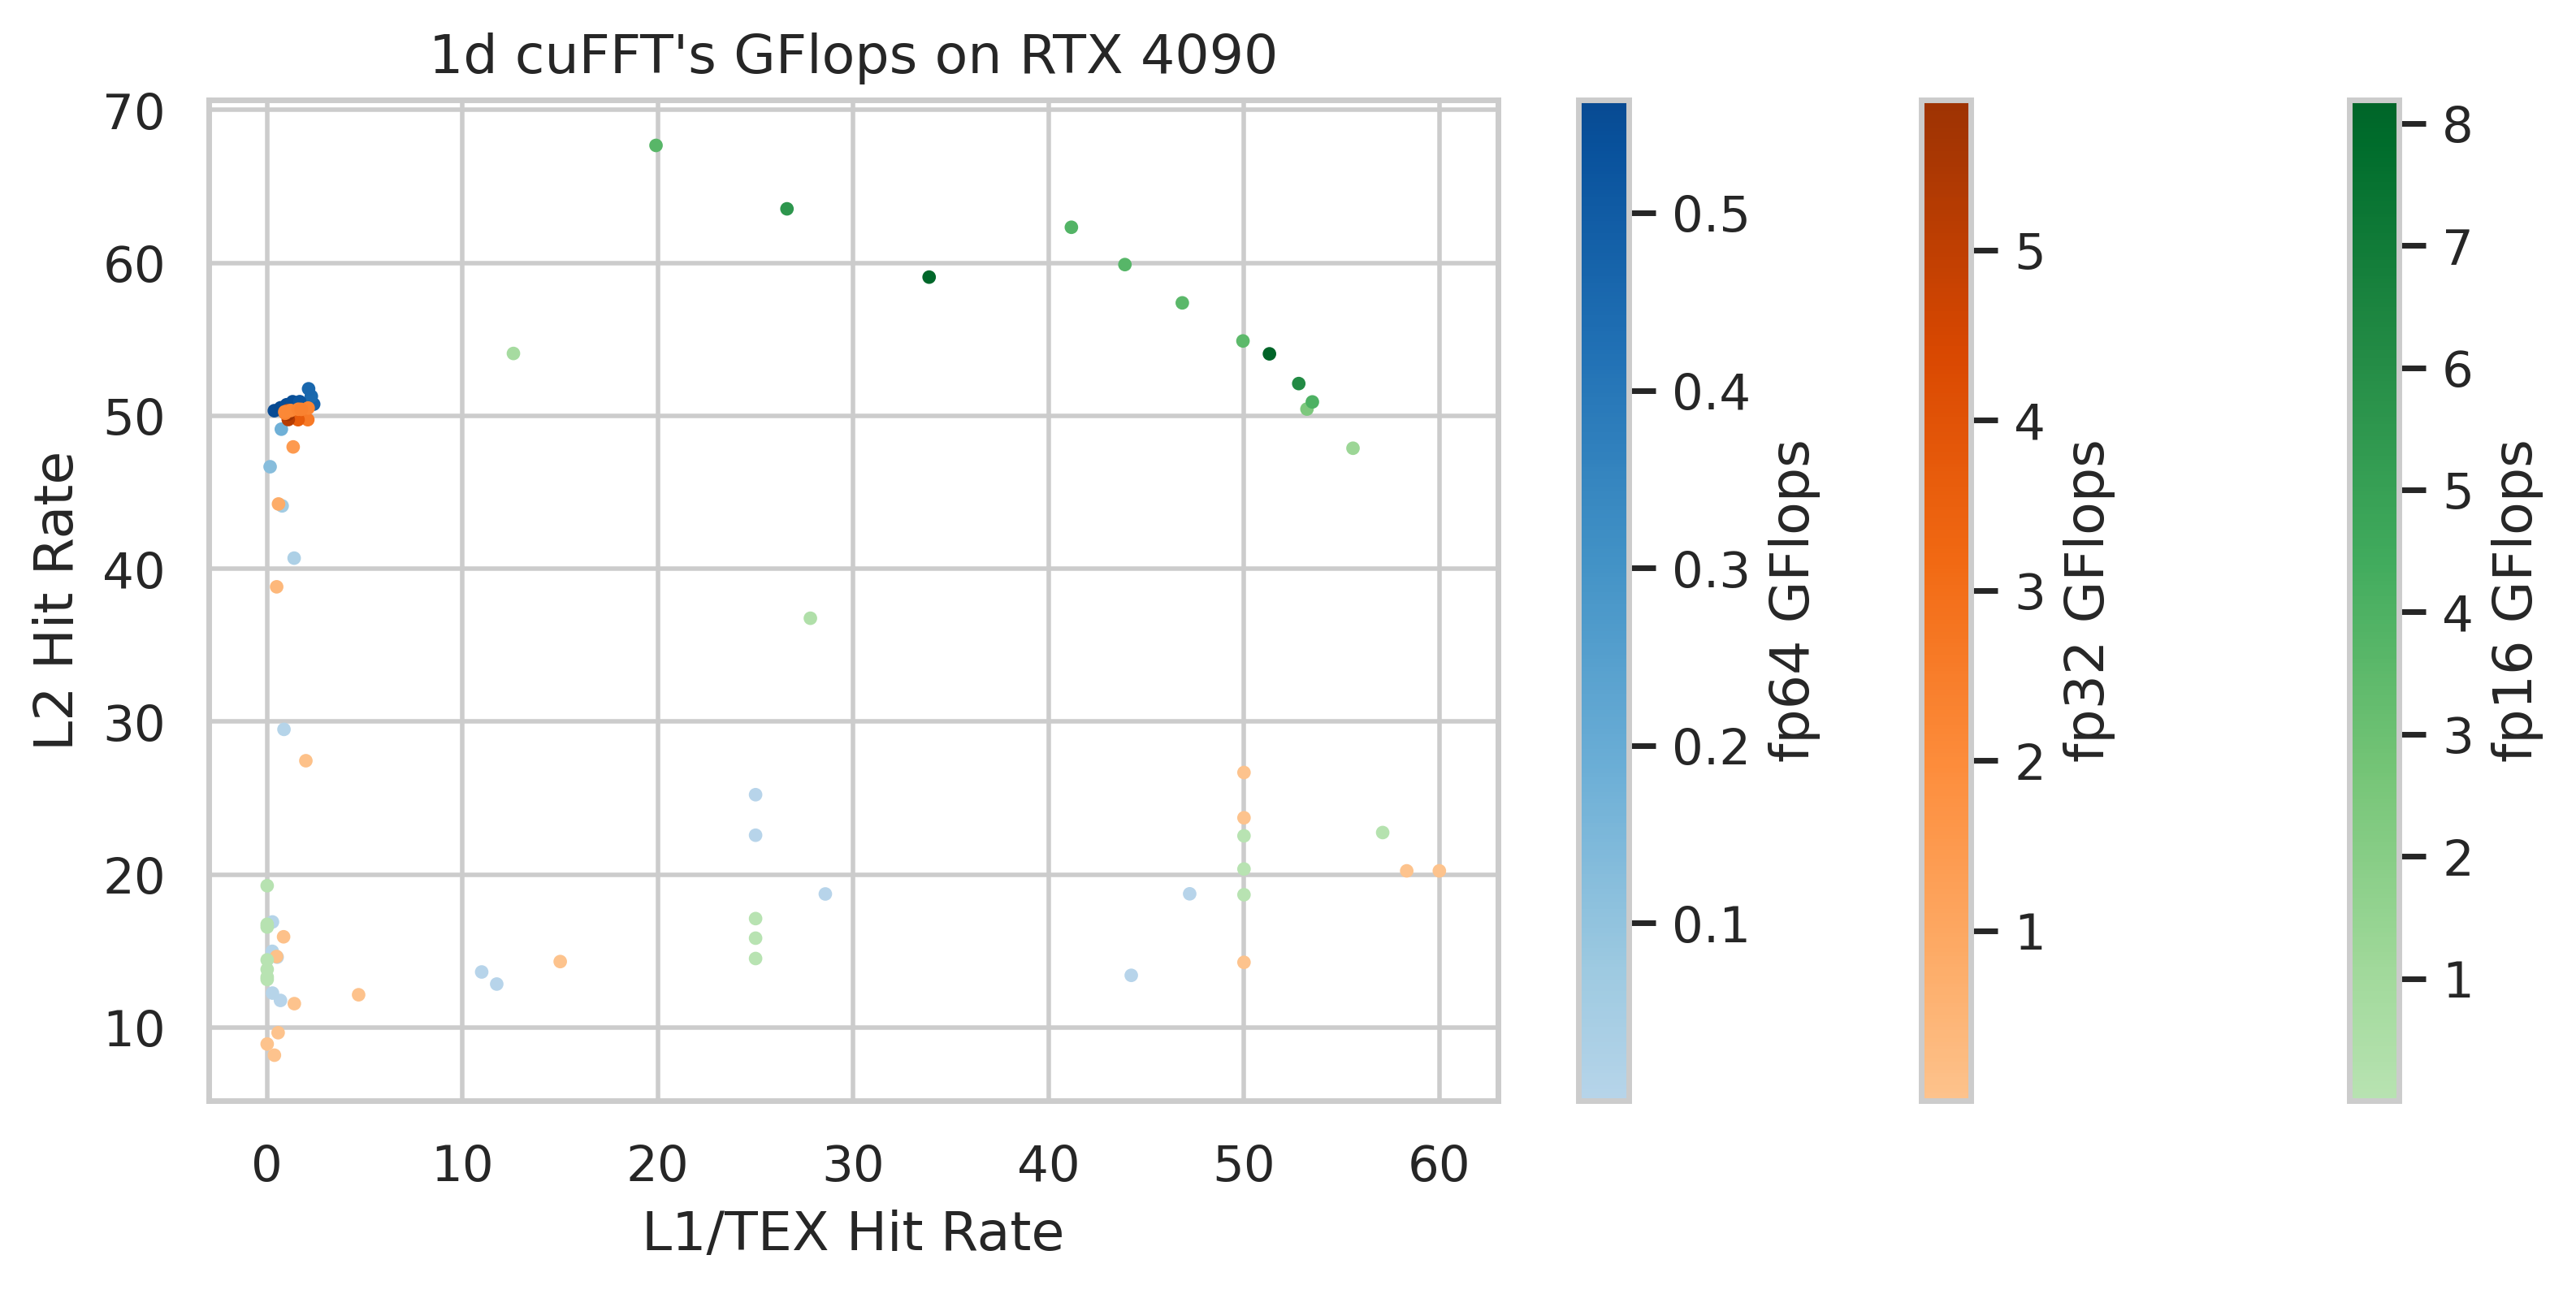

In [32]:
%matplotlib inline

plt.figure(figsize=(10, 4), dpi=400)
plt.subplots_adjust(right=None, left=None,wspace=0.05, hspace=0.05)
mark_size= 4

data_64 = cufft_1d_perf[cufft_1d_perf["pres"] == 64]
data_32 = cufft_1d_perf[cufft_1d_perf["pres"] == 32]
data_16 = cufft_1d_perf[cufft_1d_perf["pres"] == 16]

fp64 = plt.scatter(data_64["L1"], data_64["L2"], c=data_64["GFlops"], cmap=cmap_64, s=mark_size)
fp32 = plt.scatter(data_32["L1"], data_32["L2"], c=data_32["GFlops"], cmap=cmap_32, s=mark_size)
fp16 = plt.scatter(data_16["L1"], data_16["L2"], c=data_16["GFlops"], cmap=cmap_16, s=mark_size)

plt.xlabel("L1/TEX Hit Rate")
plt.ylabel("L2 Hit Rate")
plt.title("1d cuFFT's GFlops on RTX 4090")

plt.colorbar(fp16, label='fp16 GFlops')
plt.colorbar(fp32, label='fp32 GFlops')
plt.colorbar(fp64, label='fp64 GFlops')

plt.show()

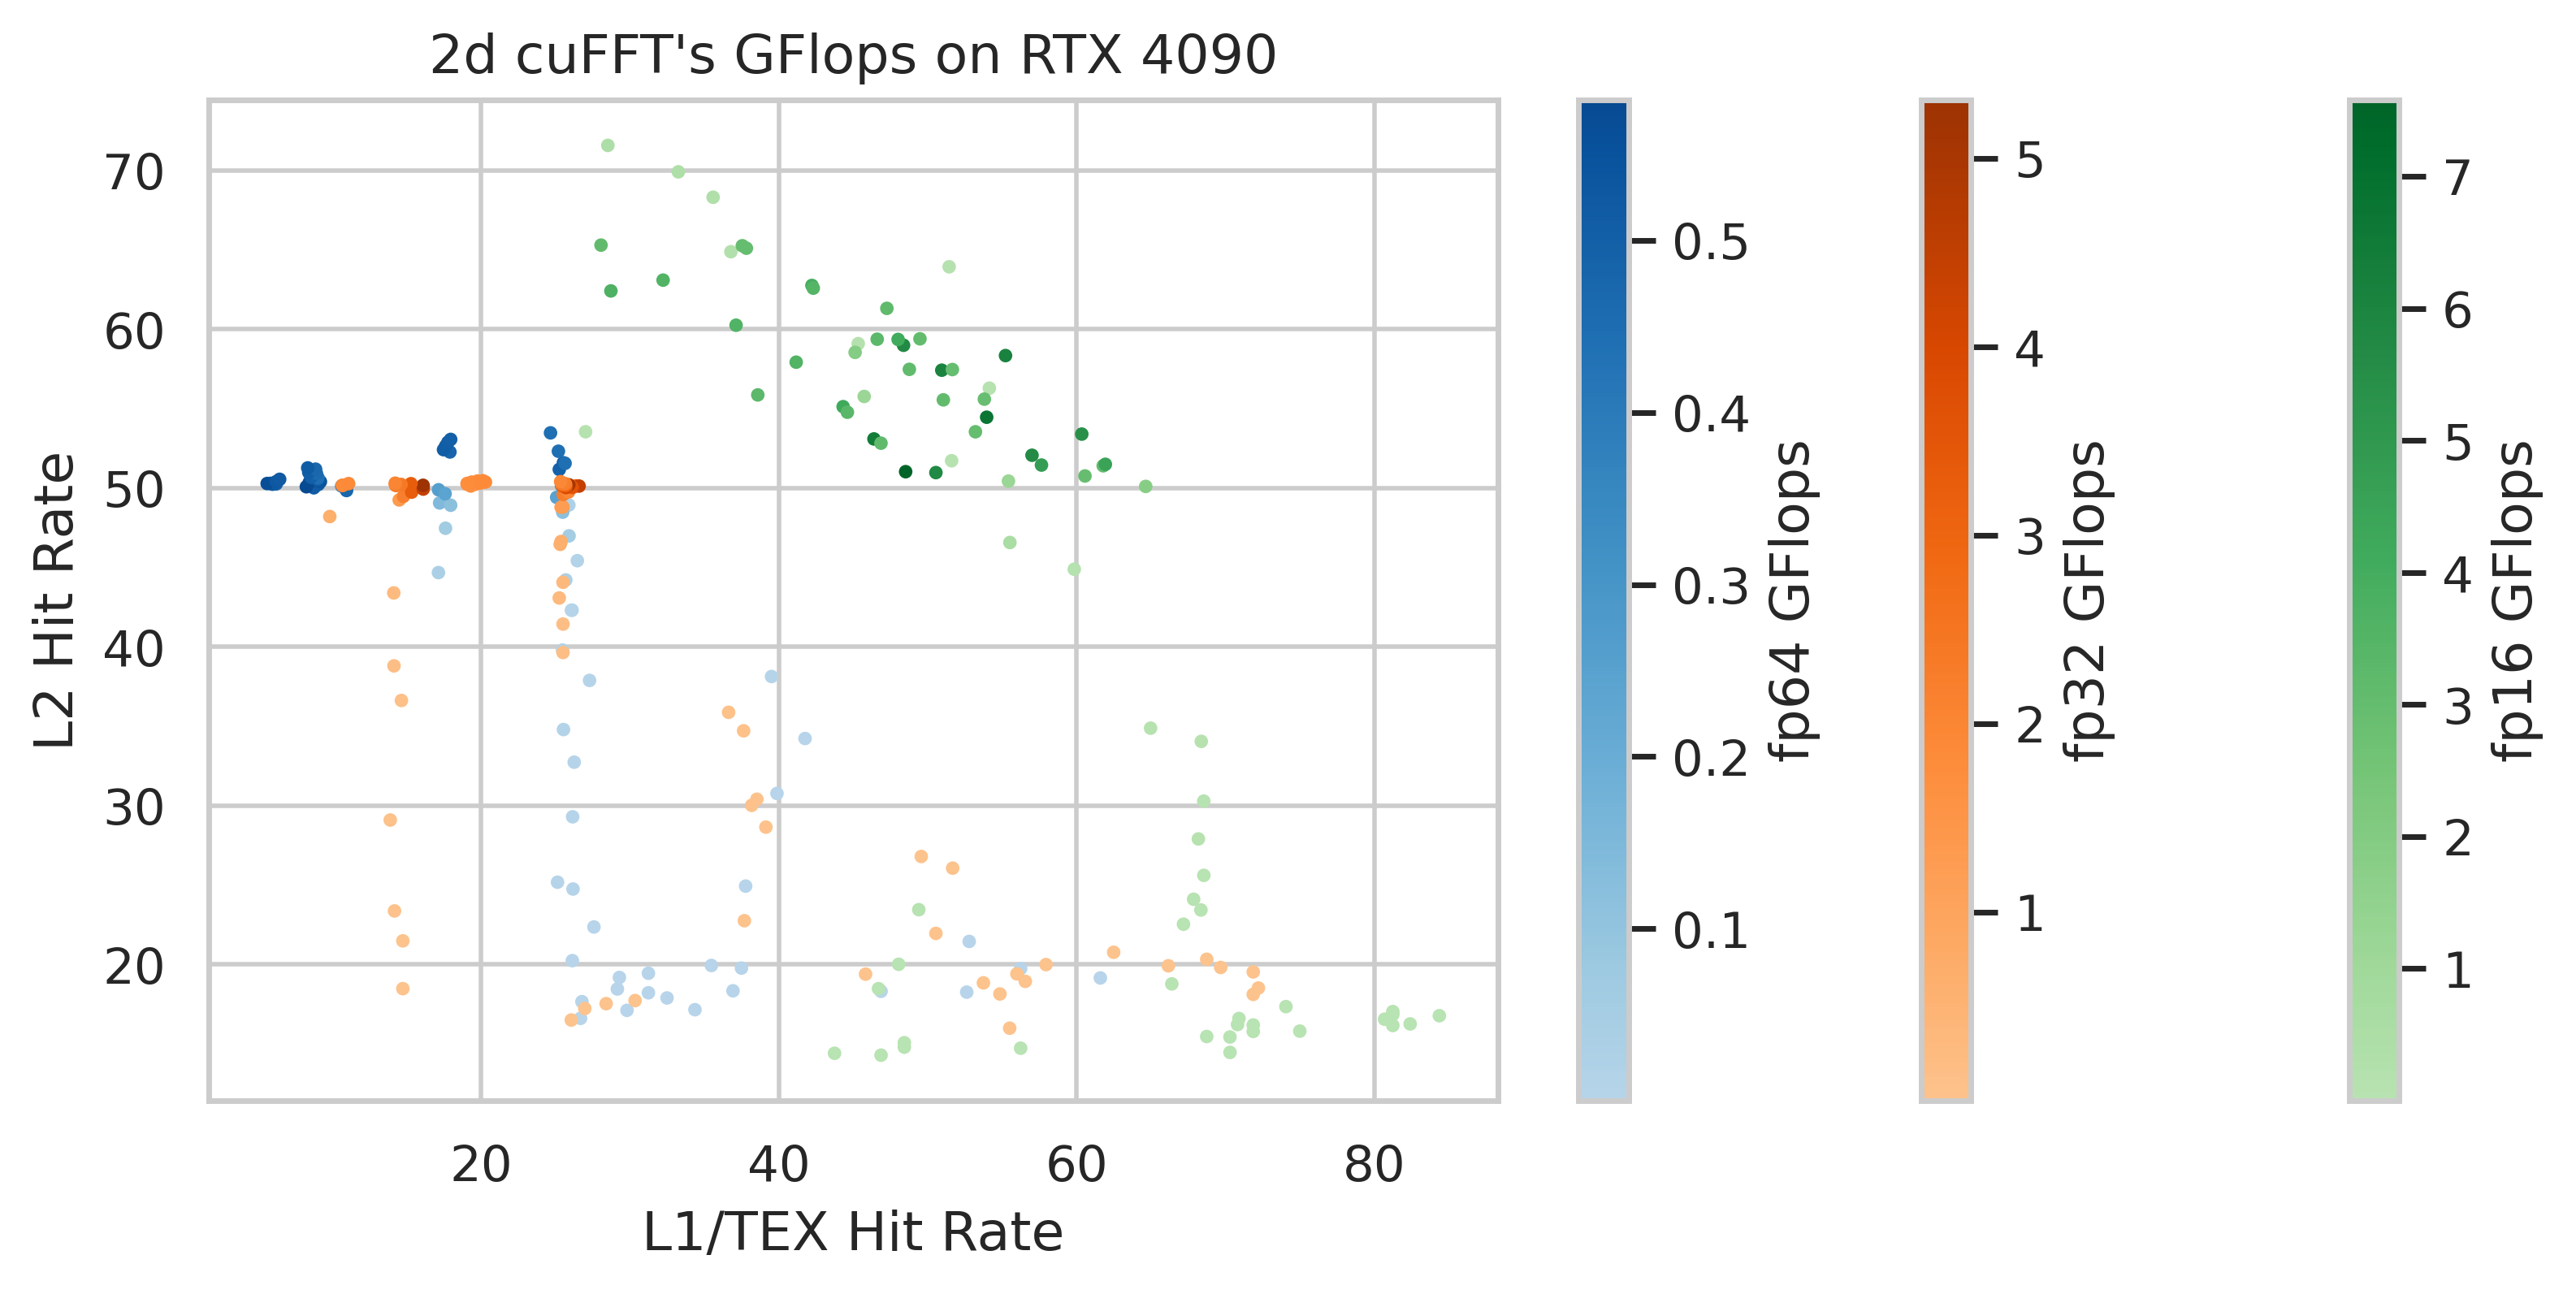

In [33]:
%matplotlib inline

plt.figure(figsize=(10, 4), dpi=400)
plt.subplots_adjust(right=None, left=None,wspace=0.05, hspace=0.05)
mark_size= 4

data_64 = cufft_2d_perf[cufft_2d_perf["pres"] == 64]
data_32 = cufft_2d_perf[cufft_2d_perf["pres"] == 32]
data_16 = cufft_2d_perf[cufft_2d_perf["pres"] == 16]

fp64 = plt.scatter(data_64["L1"], data_64["L2"], c=data_64["GFlops"], cmap=cmap_64, s=mark_size)
fp32 = plt.scatter(data_32["L1"], data_32["L2"], c=data_32["GFlops"], cmap=cmap_32, s=mark_size)
fp16 = plt.scatter(data_16["L1"], data_16["L2"], c=data_16["GFlops"], cmap=cmap_16, s=mark_size)

plt.xlabel("L1/TEX Hit Rate")
plt.ylabel("L2 Hit Rate")
plt.title("2d cuFFT's GFlops on RTX 4090")

plt.colorbar(fp16, label='fp16 GFlops')
plt.colorbar(fp32, label='fp32 GFlops')
plt.colorbar(fp64, label='fp64 GFlops')

plt.show()

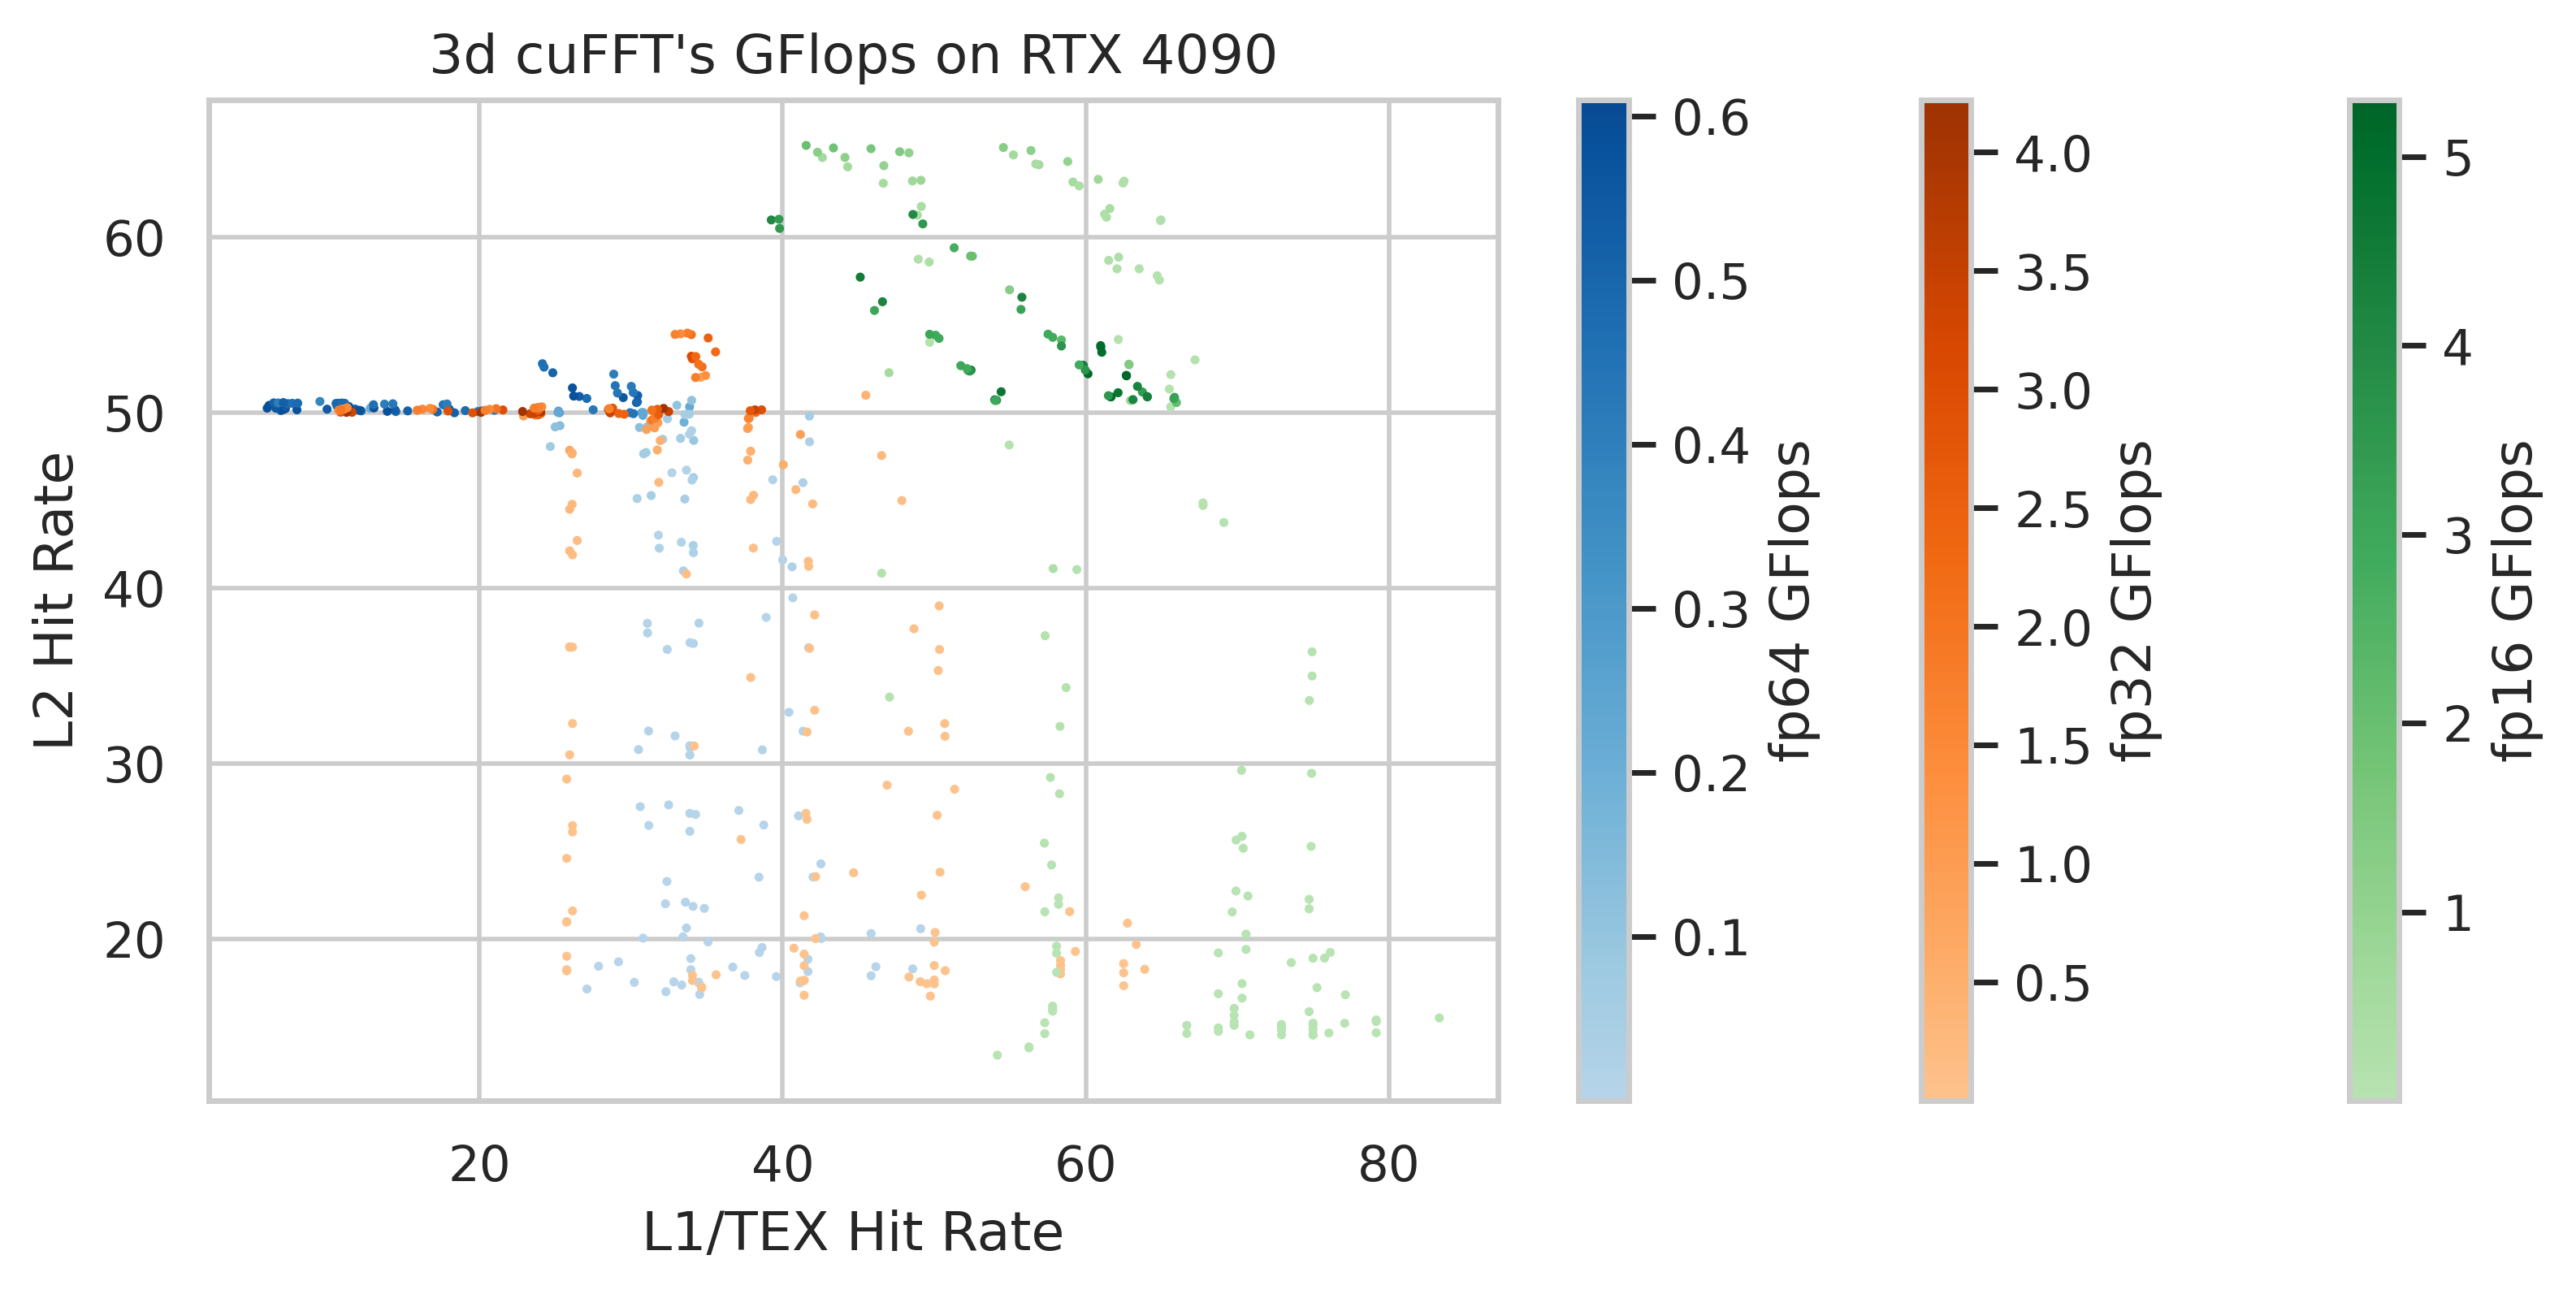

In [34]:
%matplotlib inline

plt.figure(figsize=(10, 4), dpi=400)
plt.subplots_adjust(right=None, left=None,wspace=0.05, hspace=0.05)
mark_size= 1

data_64 = cufft_3d_perf[cufft_3d_perf["pres"] == 64]
data_32 = cufft_3d_perf[cufft_3d_perf["pres"] == 32]
data_16 = cufft_3d_perf[cufft_3d_perf["pres"] == 16]

fp64 = plt.scatter(data_64["L1"], data_64["L2"], c=data_64["GFlops"], cmap=cmap_64, s=mark_size)
fp32 = plt.scatter(data_32["L1"], data_32["L2"], c=data_32["GFlops"], cmap=cmap_32, s=mark_size)
fp16 = plt.scatter(data_16["L1"], data_16["L2"], c=data_16["GFlops"], cmap=cmap_16, s=mark_size)

plt.xlabel("L1/TEX Hit Rate")
plt.ylabel("L2 Hit Rate")
plt.title("3d cuFFT's GFlops on RTX 4090")

plt.colorbar(fp16, label='fp16 GFlops')
plt.colorbar(fp32, label='fp32 GFlops')
plt.colorbar(fp64, label='fp64 GFlops')

plt.show()

In [35]:
print(plt_3d_32["GFlops"].max)
print(plt_3d_32.loc[plt_3d_32['GFlops'].idxmax()])


<bound method NDFrame._add_numeric_operations.<locals>.max of 1302     0.000022
1305     0.000058
1311     0.000346
1383     0.000058
1386     0.000143
           ...   
12488    1.677829
12494    1.775007
12524    1.700467
12527    1.772201
12533    1.893723
Name: GFlops, Length: 180, dtype: float64>
pro             3d
pres            32
n          2097152
time      0.052173
GFlops    4.220609
x             8192
y             16.0
z             16.0
Name: 10665, dtype: object


[2, 4, 16]
[2, 4, 16]


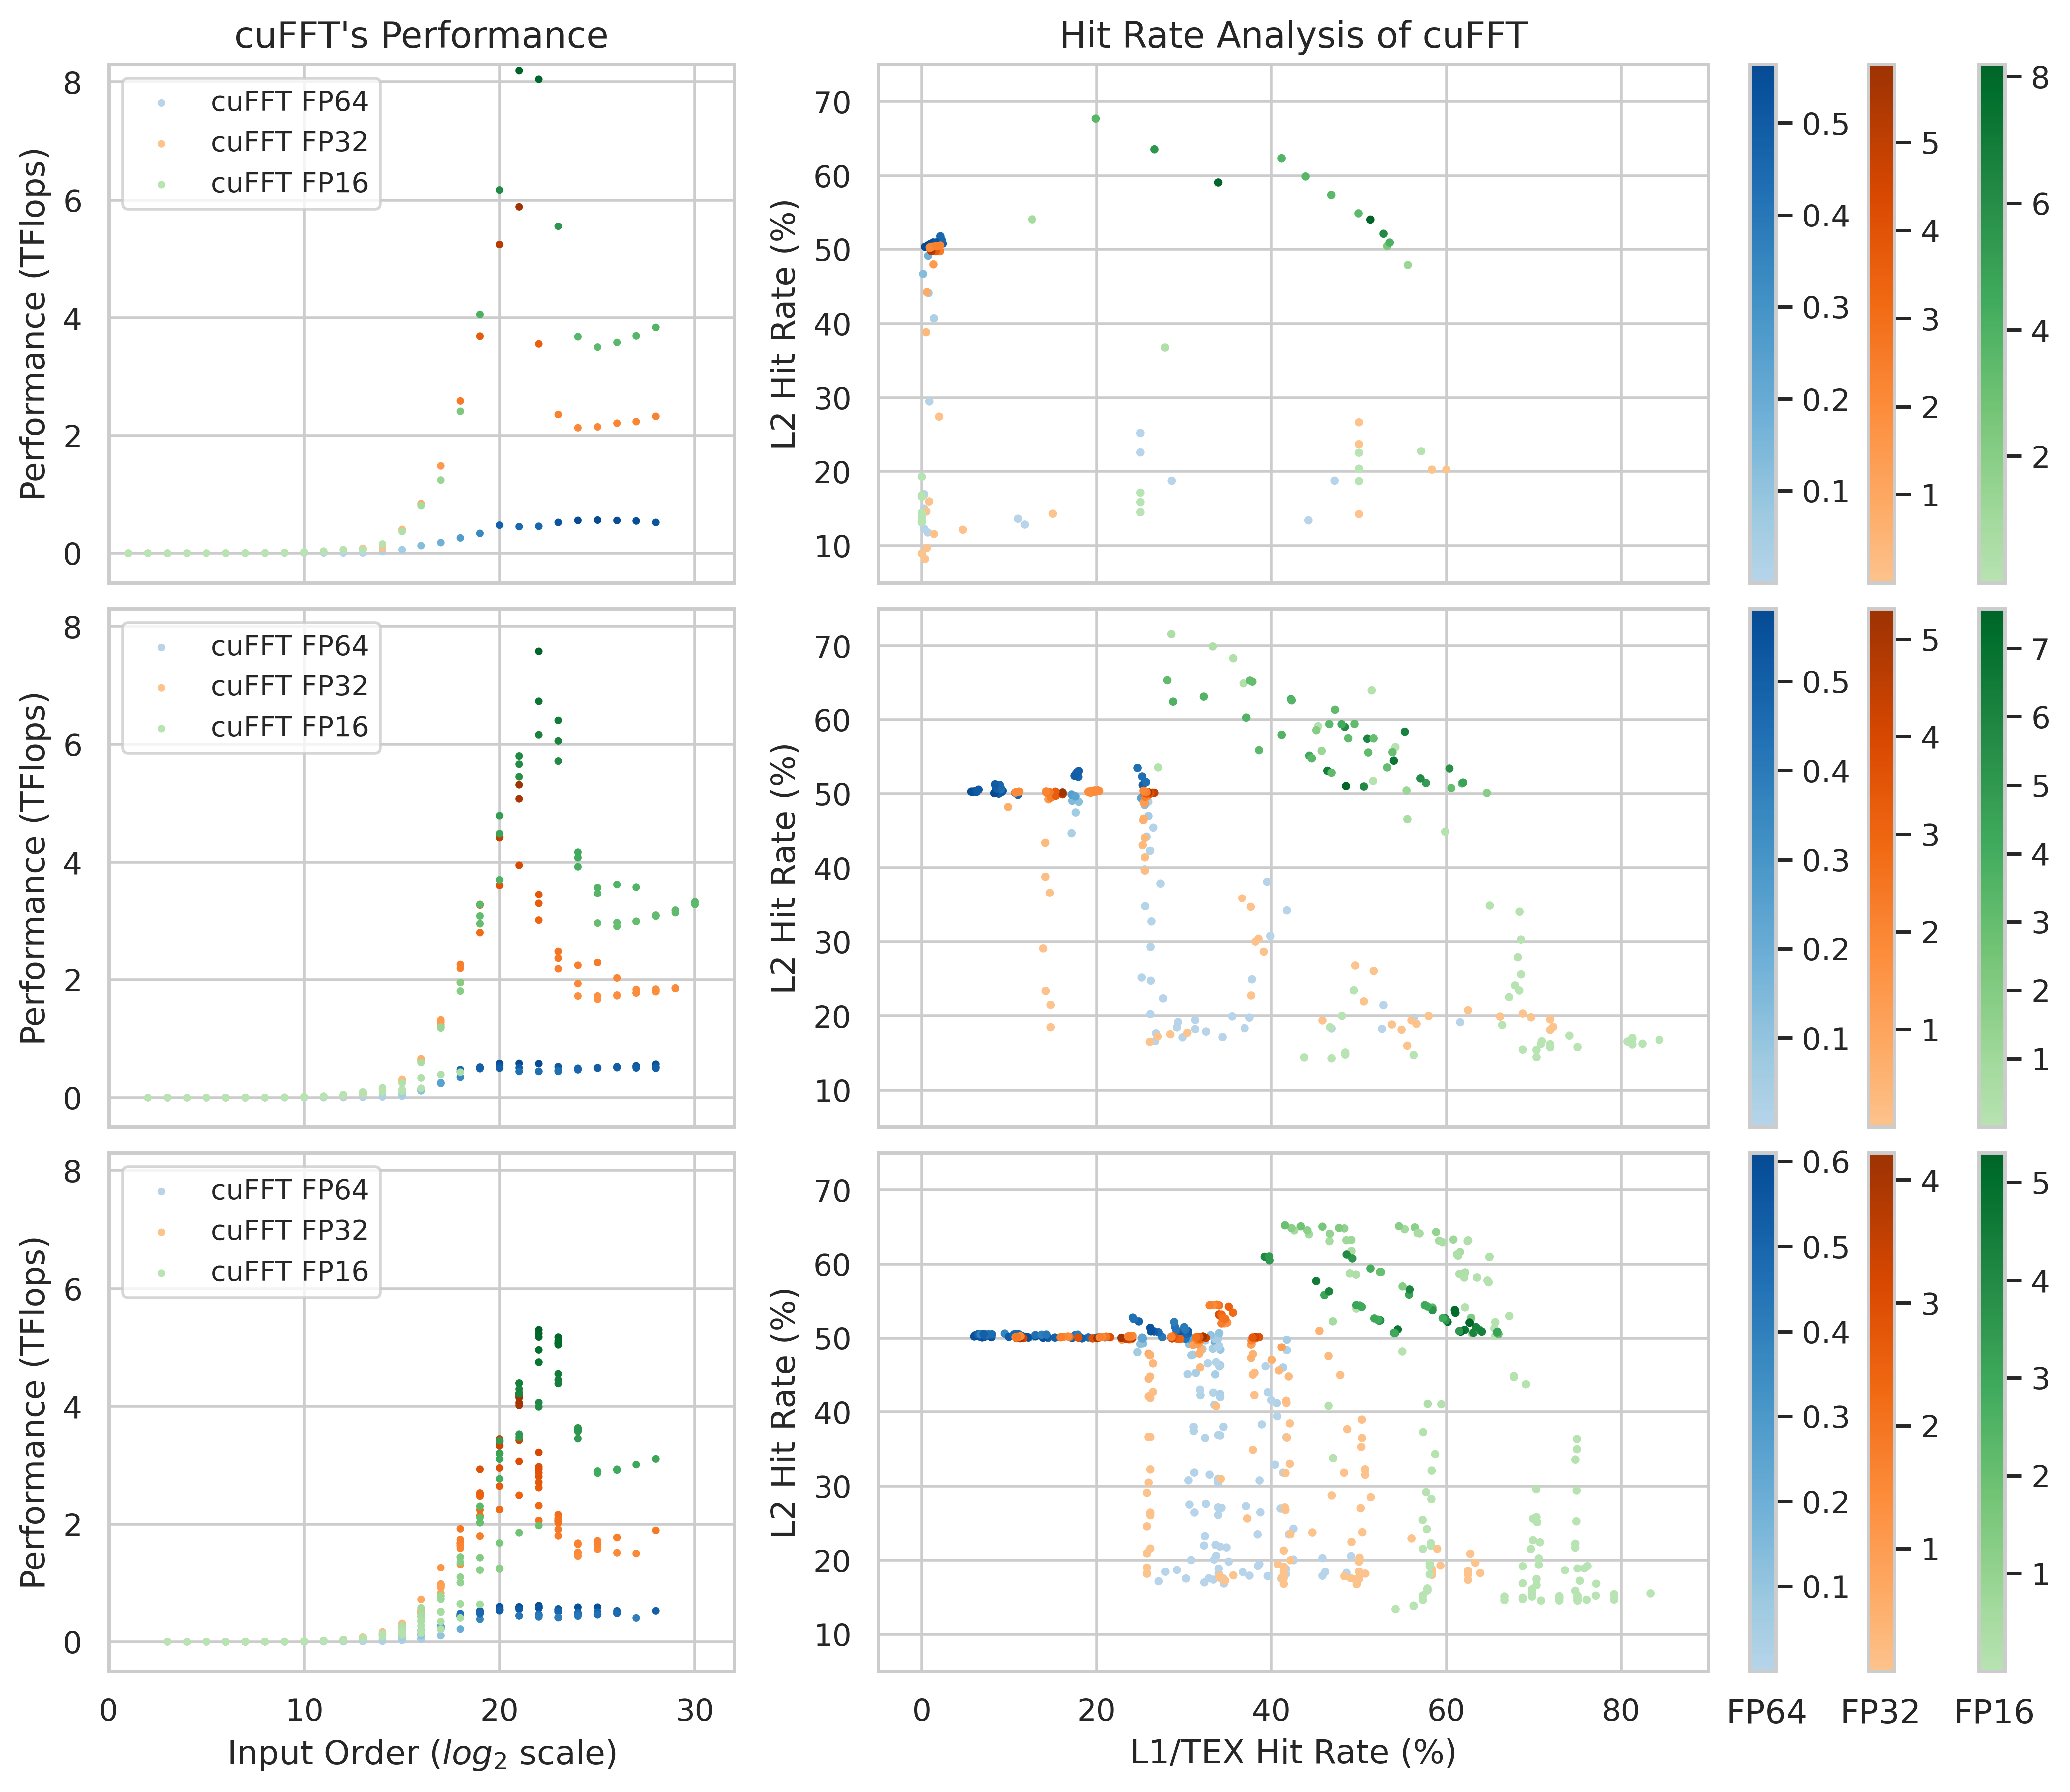

In [36]:
plt.figure(figsize=(18, 14), dpi=400)

dot_size = 3
legend_font_size = 10
tile_size = 13

plt.subplots_adjust(right=None, left=None, wspace=0.15, hspace=0.05)

plt.subplot(4, 4, 2)

plt.scatter(np.log2(cufft_64[cufft_64["pro"] == "1d"]["n"]),
            (cufft_64[cufft_64["pro"] == "1d"]["GFlops"]),
            label="cuFFT FP64",
            s=dot_size,
            c=(cufft_64[cufft_64["pro"] == "1d"]["GFlops"]),
            cmap=cmap_64)

plt.scatter(np.log2(cufft_32[cufft_32["pro"] == "1d"]["n"]),
            (cufft_32[cufft_32["pro"] == "1d"]["GFlops"]),
            label="cuFFT FP32",
            s=dot_size,
            c=(cufft_32[cufft_32["pro"] == "1d"]["GFlops"]),
            cmap=cmap_32)

plt.scatter(np.log2(cufft_16[cufft_16["pro"] == "1d"]["n"]),
            (cufft_16[cufft_16["pro"] == "1d"]["GFlops"]),
            label="cuFFT FP16",
            s=dot_size,
            c=(cufft_16[cufft_16["pro"] == "1d"]["GFlops"]),
            cmap=cmap_16)

plt.xlim(0, 32)
plt.ylim(-0.5, 8.3)
plt.legend(loc=2, fontsize=legend_font_size)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.title("cuFFT's Performance", fontsize=tile_size, fontweight="normal")
plt.ylabel("Performance (TFlops)")
# plt.xlabel("Input Order ($log_2$ scale)")

plt.subplot(4, 4, 6)

mask_2d = [2, 4, 16]
print(mask_2d)

plt_2d_64 = cufft_64[cufft_64["pro"] == "2d"][cufft_64[cufft_64["pro"] == "2d"]
                                              ["y"].isin(mask_2d)]
plt_2d_32 = cufft_32[cufft_32["pro"] == "2d"][cufft_32[cufft_32["pro"] == "2d"]
                                              ["y"].isin(mask_2d)]
plt_2d_16 = cufft_16[cufft_16["pro"] == "2d"][cufft_16[cufft_16["pro"] == "2d"]
                                              ["y"].isin(mask_2d)]

plt.scatter(np.log2(plt_2d_64["n"]), (plt_2d_64["GFlops"]),
            label="cuFFT FP64",
            s=dot_size,
            c=(plt_2d_64["GFlops"]),
            cmap=cmap_64)

plt.scatter(np.log2(plt_2d_32["n"]), (plt_2d_32["GFlops"]),
            label="cuFFT FP32",
            s=dot_size,
            c=(plt_2d_32["GFlops"]),
            cmap=cmap_32)

plt.scatter(np.log2(plt_2d_16["n"]), (plt_2d_16["GFlops"]),
            label="cuFFT FP16",
            s=dot_size,
            c=(plt_2d_16["GFlops"]),
            cmap=cmap_16)
plt.xlim(0, 32)
plt.ylim(-0.5, 8.3)
plt.legend(loc=2, fontsize=legend_font_size)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
# plt.title("cuFFT 2d", fontsize=tile_size, fontweight="normal")
plt.ylabel("Performance (TFlops)")
# plt.xlabel("Input Order ($log_2$ scale)")

plt.subplot(4, 4, 10)

dot_size = 3
legend_font_size = 10

mask_3d = [2, 4, 16]
print(mask_3d)

plt_3d_64 = cufft_64[cufft_64["pro"] == "3d"][cufft_64[cufft_64["pro"] == "3d"]
                                              ["z"].isin(mask_3d)]
plt_3d_32 = cufft_32[cufft_32["pro"] == "3d"][cufft_32[cufft_32["pro"] == "3d"]
                                              ["z"].isin(mask_3d)]
plt_3d_16 = cufft_16[cufft_16["pro"] == "3d"][cufft_16[cufft_16["pro"] == "3d"]
                                              ["z"].isin(mask_3d)]

plt_3d_64 = plt_3d_64[plt_3d_64["y"].isin(mask_3d)]
plt_3d_32 = plt_3d_32[plt_3d_32["y"].isin(mask_3d)]
plt_3d_16 = plt_3d_16[plt_3d_16["y"].isin(mask_3d)]

plt.scatter(np.log2(plt_3d_64["n"]), (plt_3d_64["GFlops"]),
            label="cuFFT FP64",
            s=dot_size,
            c=(plt_3d_64["GFlops"]),
            cmap=cmap_64)

plt.scatter(np.log2(plt_3d_32["n"]), (plt_3d_32["GFlops"]),
            label="cuFFT FP32",
            s=dot_size,
            c=(plt_3d_32["GFlops"]),
            cmap=cmap_32)

plt.scatter(np.log2(plt_3d_16["n"]), (plt_3d_16["GFlops"]),
            label="cuFFT FP16",
            s=dot_size,
            c=(plt_3d_16["GFlops"]),
            cmap=cmap_16)

plt.legend(loc=2, fontsize=legend_font_size)
plt.xlim(0, 32)
plt.ylim(-0.5, 8.3)
# plt.ylim(-500, 10000)
# plt.title("cuFFT 3d", fontsize=tile_size, fontweight="normal")
plt.ylabel("Performance (TFlops)")
plt.xlabel("Input Order ($log_2$ scale)")

plt.subplot(4, 2, 2)

mark_size = 4

data_64 = cufft_1d_perf[cufft_1d_perf["pres"] == 64]
data_32 = cufft_1d_perf[cufft_1d_perf["pres"] == 32]
data_16 = cufft_1d_perf[cufft_1d_perf["pres"] == 16]

fp64 = plt.scatter(data_64["L1"],
                   data_64["L2"],
                   c=data_64["GFlops"],
                   cmap=cmap_64,
                   s=mark_size)
fp32 = plt.scatter(data_32["L1"],
                   data_32["L2"],
                   c=data_32["GFlops"],
                   cmap=cmap_32,
                   s=mark_size)
fp16 = plt.scatter(data_16["L1"],
                   data_16["L2"],
                   c=data_16["GFlops"],
                   cmap=cmap_16,
                   s=mark_size)

# plt.xlabel("L1/TEX Hit Rate")
plt.ylabel("L2 Hit Rate (%)")
plt.title("Hit Rate Analysis of cuFFT",
          fontsize=tile_size,
          fontweight="normal")
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.colorbar(fp16, pad=-0.05)
plt.colorbar(fp32, pad=-0.03)
plt.colorbar(fp64, pad=0.04)
plt.xlim(-5, 90)
plt.ylim(5, 75)

plt.subplot(4, 2, 4)
mark_size = 4

data_64 = cufft_2d_perf[cufft_2d_perf["pres"] == 64]
data_32 = cufft_2d_perf[cufft_2d_perf["pres"] == 32]
data_16 = cufft_2d_perf[cufft_2d_perf["pres"] == 16]

fp64 = plt.scatter(data_64["L1"],
                   data_64["L2"],
                   c=data_64["GFlops"],
                   cmap=cmap_64,
                   s=mark_size)
fp32 = plt.scatter(data_32["L1"],
                   data_32["L2"],
                   c=data_32["GFlops"],
                   cmap=cmap_32,
                   s=mark_size)
fp16 = plt.scatter(data_16["L1"],
                   data_16["L2"],
                   c=data_16["GFlops"],
                   cmap=cmap_16,
                   s=mark_size)

# plt.xlabel("L1/TEX Hit Rate")
plt.ylabel("L2 Hit Rate (%)")
# plt.title("2d cuFFT's GFlops on RTX 4090", fontsize=tile_size, fontweight="normal")
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
# ax.axes.yaxis.set_ticklabels([])
plt.colorbar(fp16, pad=-0.05)
plt.colorbar(fp32, pad=-0.03)
plt.colorbar(fp64, pad=0.04)
plt.xlim(-5, 90)
plt.ylim(5, 75)

plt.subplot(4, 2, 6)

mark_size = 4

data_64 = cufft_3d_perf[cufft_3d_perf["pres"] == 64]
data_32 = cufft_3d_perf[cufft_3d_perf["pres"] == 32]
data_16 = cufft_3d_perf[cufft_3d_perf["pres"] == 16]

fp64 = plt.scatter(data_64["L1"],
                   data_64["L2"],
                   c=data_64["GFlops"],
                   cmap=cmap_64,
                   s=mark_size)
fp32 = plt.scatter(data_32["L1"],
                   data_32["L2"],
                   c=data_32["GFlops"],
                   cmap=cmap_32,
                   s=mark_size)
fp16 = plt.scatter(data_16["L1"],
                   data_16["L2"],
                   c=data_16["GFlops"],
                   cmap=cmap_16,
                   s=mark_size)

plt.xlabel("L1/TEX Hit Rate (%)")
plt.ylabel("L2 Hit Rate (%)")
# plt.title("3d cuFFT's GFlops on RTX 4090", fontsize=tile_size, fontweight="normal")
plt.xlim(-5, 90)
plt.ylim(5, 75)
plt.colorbar(fp16, pad=-0.05)
plt.colorbar(fp32, pad=-0.03)
plt.colorbar(fp64, pad=0.04)
plt.text(92, -2, "FP64")
plt.text(105, -2, "FP32")
plt.text(118, -2, "FP16")
plt.savefig(out_file_path + "cuFFT_4090.pdf",
            dpi=400,
            format="pdf",
            bbox_inches='tight',
            pad_inches=0.0)


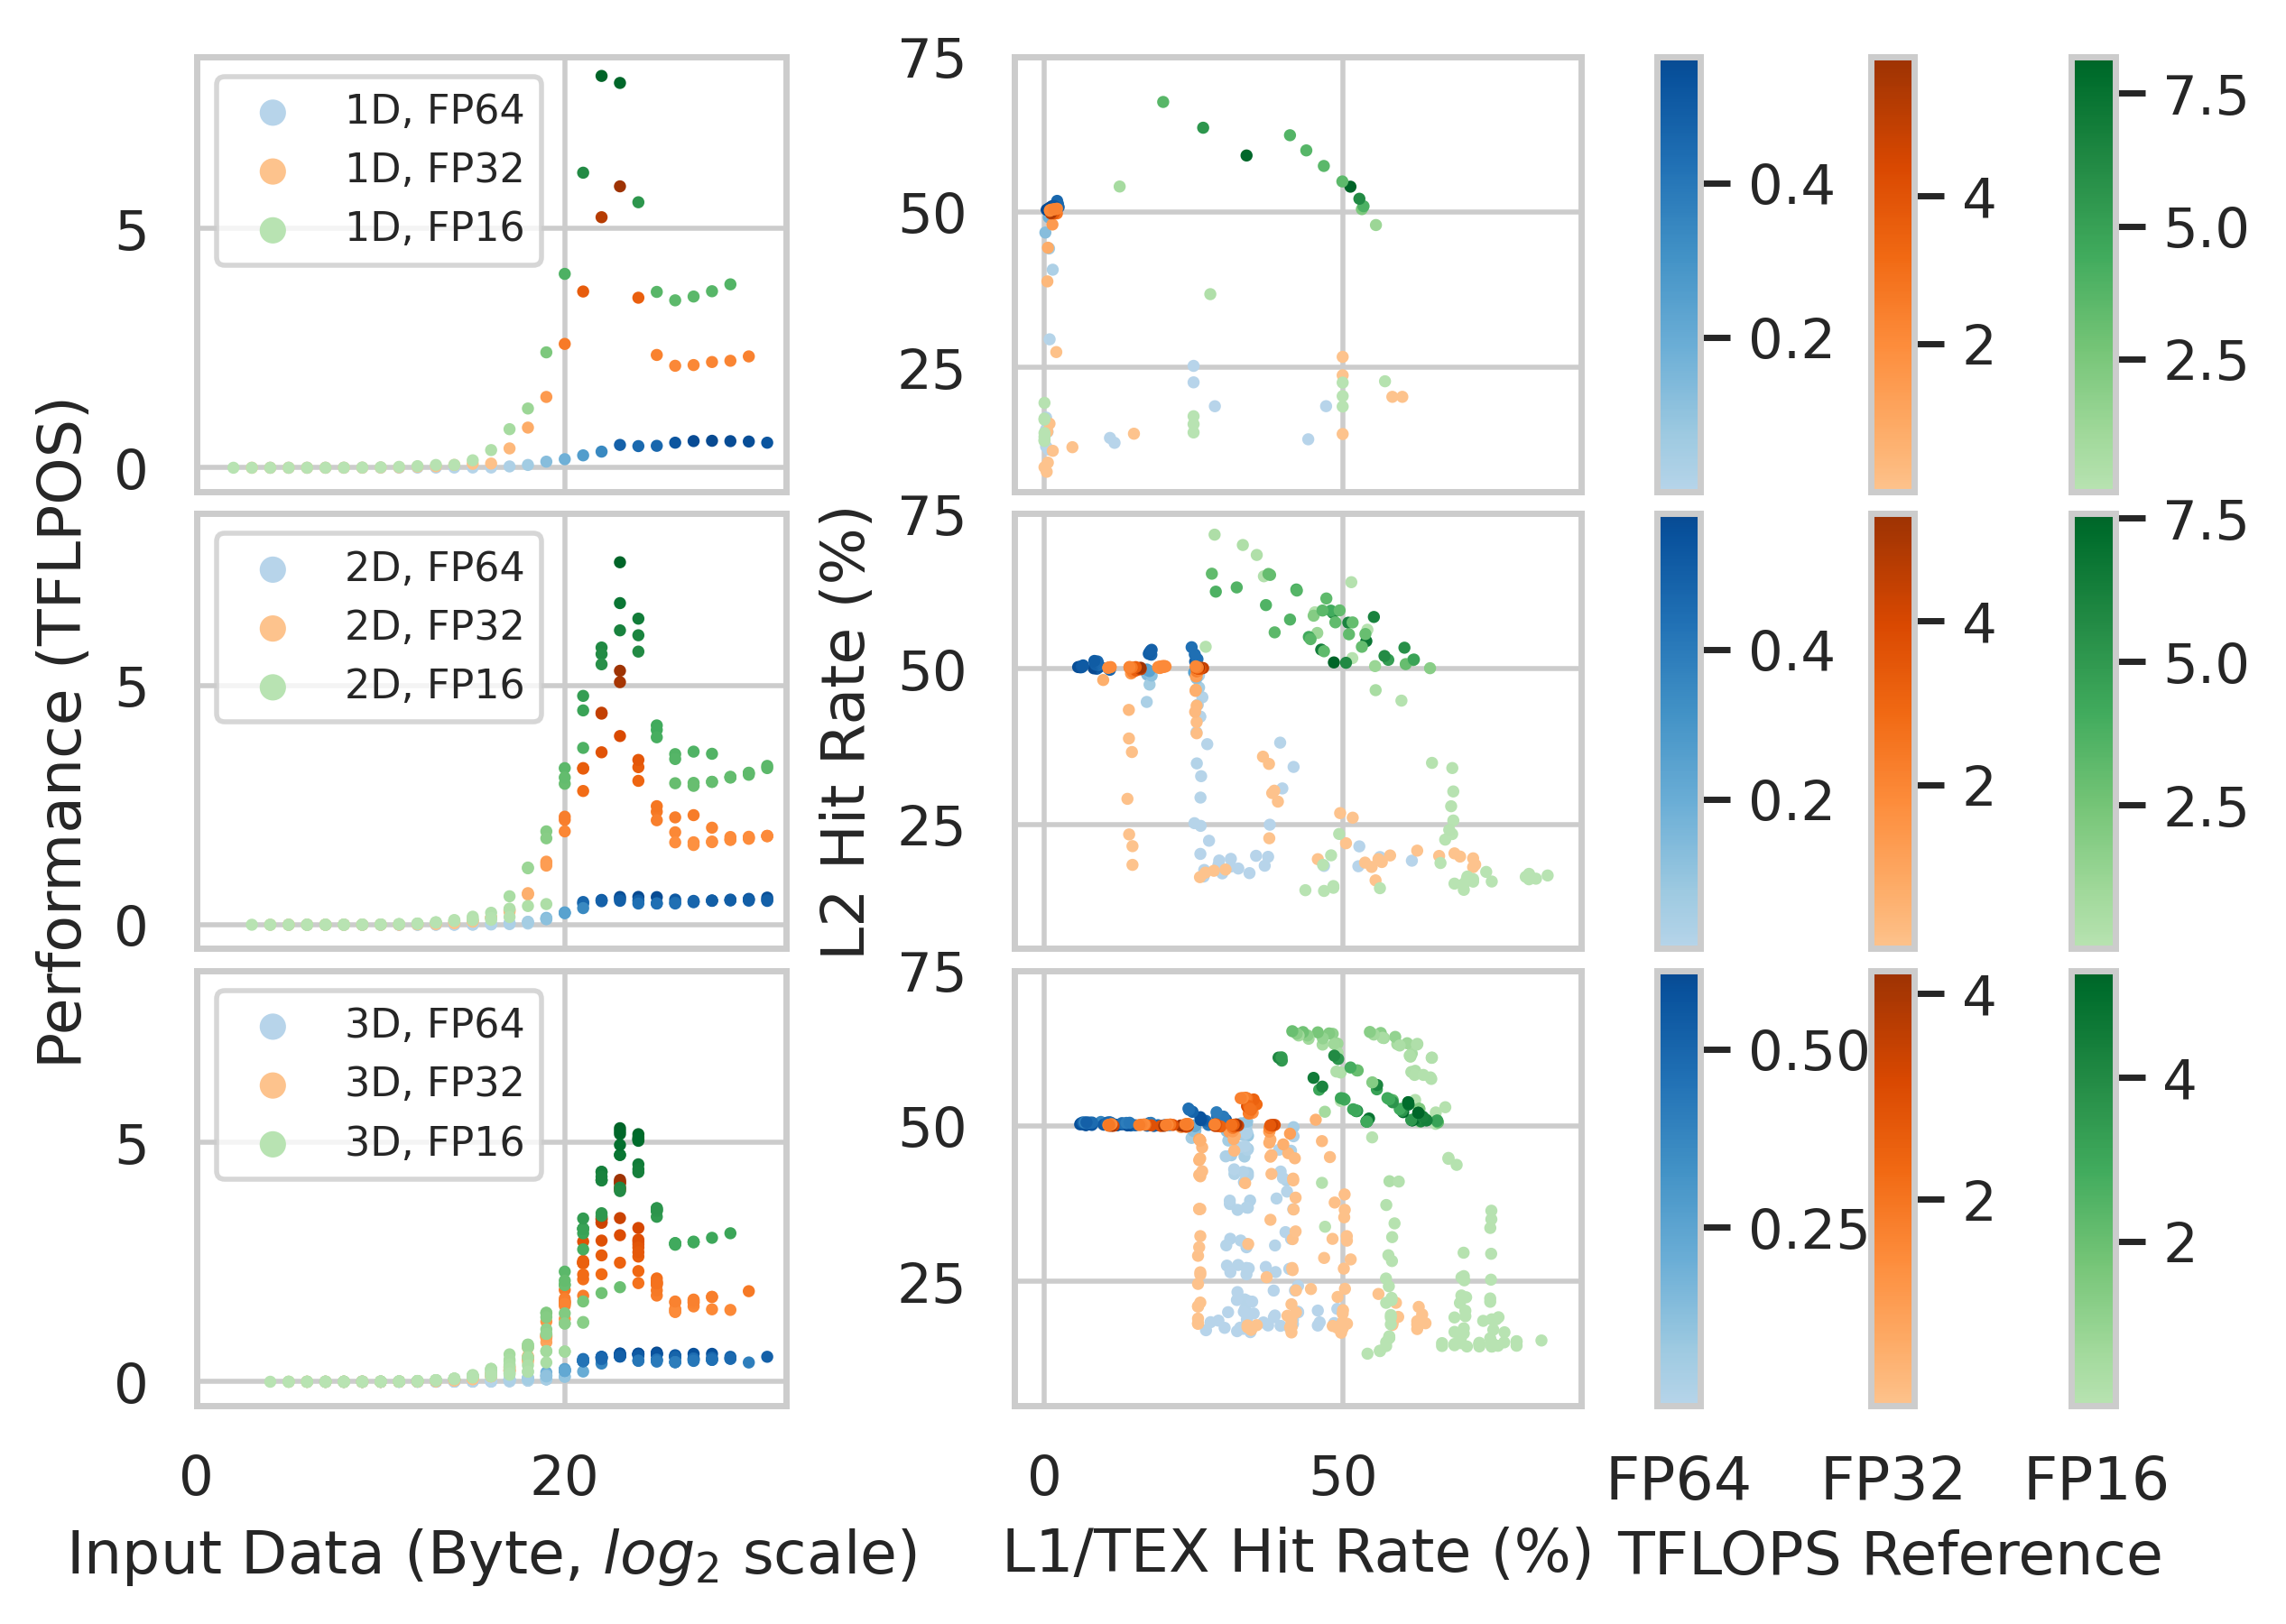

In [37]:
%matplotlib inline

sns.set()
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6.5), dpi=400)
# plt.figure(figsize=(18, 14), dpi=400)

dot_size = 2
legend_font_size = 8
tile_size = 13

plt.subplots_adjust(right=None, left=None, wspace=0.25, hspace=0.05)

plt.subplot(4, 4, 2)

plt.scatter(
    np.log2(cufft_64[cufft_64["pro"] == "1d"]["n"] * 8),
    (cufft_64[cufft_64["pro"] == "1d"]["GFlops"]),
    label="1D, FP64",
    c=(cufft_64[cufft_64["pro"] == "1d"]["GFlops"]),
    cmap=cmap_64,
    s=dot_size,
)

plt.scatter(
    np.log2(cufft_32[cufft_32["pro"] == "1d"]["n"] * 4),
    (cufft_32[cufft_32["pro"] == "1d"]["GFlops"]),
    label="1D, FP32",
    c=(cufft_32[cufft_32["pro"] == "1d"]["GFlops"]),
    cmap=cmap_32,
    s=dot_size,
)

plt.scatter(
    np.log2(cufft_16[cufft_16["pro"] == "1d"]["n"] * 2),
    (cufft_16[cufft_16["pro"] == "1d"]["GFlops"]),
    label="1D, FP16",
    c=(cufft_16[cufft_16["pro"] == "1d"]["GFlops"]),
    cmap=cmap_16,
    s=dot_size,
)
plt.xlim(0, 32)
plt.ylim(-0.5, 8.6)
plt.legend(loc=2, fontsize=legend_font_size, markerscale=3)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
# plt.title("cuFFT's Performance", fontsize=tile_size, fontweight="normal")
# plt.ylabel("Performance (TFlops)")
# plt.xlabel("Input Order ($log_2$ scale)")

plt.subplot(4, 4, 6)

mask_2d = [2, 4, 16]

plt_2d_64 = cufft_64[cufft_64["pro"] == "2d"][cufft_64[cufft_64["pro"] == "2d"]
                                              ["y"].isin(mask_2d)]
plt_2d_32 = cufft_32[cufft_32["pro"] == "2d"][cufft_32[cufft_32["pro"] == "2d"]
                                              ["y"].isin(mask_2d)]
plt_2d_16 = cufft_16[cufft_16["pro"] == "2d"][cufft_16[cufft_16["pro"] == "2d"]
                                              ["y"].isin(mask_2d)]

plt.scatter(
    np.log2(plt_2d_64["n"] * 8),
    (plt_2d_64["GFlops"]),
    label="2D, FP64",
    c=(plt_2d_64["GFlops"]),
    cmap=cmap_64,
    s=dot_size,
)

plt.scatter(
    np.log2(plt_2d_32["n"] * 4),
    (plt_2d_32["GFlops"]),
    label="2D, FP32",
    c=(plt_2d_32["GFlops"]),
    cmap=cmap_32,
    s=dot_size,
)

plt.scatter(
    np.log2(plt_2d_16["n"] * 2),
    (plt_2d_16["GFlops"]),
    label="2D, FP16",
    c=(plt_2d_16["GFlops"]),
    cmap=cmap_16,
    s=dot_size,
)
plt.xlim(0, 32)
plt.ylim(-0.5, 8.6)
plt.legend(loc=2, fontsize=legend_font_size, markerscale=3)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
# plt.title("cuFFT 2d", fontsize=tile_size, fontweight="normal")
plt.ylabel("Performance (TFLPOS)")
# plt.xlabel("Input Order ($log_2$ scale)")

plt.subplot(4, 4, 10)

mask_3d = [2, 4, 16]

plt_3d_64 = cufft_64[cufft_64["pro"] == "3d"][cufft_64[cufft_64["pro"] == "3d"]
                                              ["z"].isin(mask_3d)]
plt_3d_32 = cufft_32[cufft_32["pro"] == "3d"][cufft_32[cufft_32["pro"] == "3d"]
                                              ["z"].isin(mask_3d)]
plt_3d_16 = cufft_16[cufft_16["pro"] == "3d"][cufft_16[cufft_16["pro"] == "3d"]
                                              ["z"].isin(mask_3d)]

plt_3d_64 = plt_3d_64[plt_3d_64["y"].isin(mask_3d)]
plt_3d_32 = plt_3d_32[plt_3d_32["y"].isin(mask_3d)]
plt_3d_16 = plt_3d_16[plt_3d_16["y"].isin(mask_3d)]

plt.scatter(
    np.log2(plt_3d_64["n"] * 8),
    (plt_3d_64["GFlops"]),
    label="3D, FP64",
    c=(plt_3d_64["GFlops"]),
    cmap=cmap_64,
    s=dot_size,
)

plt.scatter(
    np.log2(plt_3d_32["n"] * 4),
    (plt_3d_32["GFlops"]),
    label="3D, FP32",
    c=(plt_3d_32["GFlops"]),
    cmap=cmap_32,
    s=dot_size,
)

# inc_dot_size = np.arange(1, 1+0.05*len(plt_3d_32["n"]), 0.05)
# print(inc_dot_size)

plt.scatter(
    np.log2(plt_3d_16["n"] * 2),
    (plt_3d_16["GFlops"]),
    label="3D, FP16",
    c=(plt_3d_16["GFlops"]),
    cmap=cmap_16,
    # s=np.log2(data_16["n"]),
    s=dot_size,
)
plt.legend(loc=2, fontsize=legend_font_size, markerscale=3)
plt.xlim(0, 32)
plt.ylim(-0.5, 8.6)
# plt.ylim(-500, 10000)
# plt.title("cuFFT 3d", fontsize=tile_size, fontweight="normal")
# plt.ylabel("Performance (TFlops)")
plt.xlabel("Input Data (Byte, $log_2$ scale)")

plt.subplot(4, 2, 2)

data_64 = cufft_1d_perf[cufft_1d_perf["pres"] == 64]
data_32 = cufft_1d_perf[cufft_1d_perf["pres"] == 32]
data_16 = cufft_1d_perf[cufft_1d_perf["pres"] == 16]

fp64 = plt.scatter(
    data_64["L1"],
    data_64["L2"],
    c=data_64["GFlops"],
    cmap=cmap_64,
    s=dot_size,
)
fp32 = plt.scatter(
    data_32["L1"],
    data_32["L2"],
    c=data_32["GFlops"],
    cmap=cmap_32,
    s=dot_size,
)
fp16 = plt.scatter(
    data_16["L1"],
    data_16["L2"],
    c=data_16["GFlops"],
    cmap=cmap_16,
    s=dot_size,
)

# plt.xlabel("L1/TEX Hit Rate")
# plt.ylabel("L2 Hit Rate (%)")
# plt.title("Hit Rate Analysis of cuFFT",
#           fontsize=tile_size,
#           fontweight="normal")
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])

plt.colorbar(fp16, pad=0.04, aspect=10)
plt.colorbar(fp32, pad=0.1, aspect=10)
plt.colorbar(fp64, pad=0.1, aspect=10)

plt.xlim(-5, 90)
plt.ylim(5, 75)

plt.subplot(4, 2, 4)

data_64 = cufft_2d_perf[cufft_2d_perf["pres"] == 64]
data_32 = cufft_2d_perf[cufft_2d_perf["pres"] == 32]
data_16 = cufft_2d_perf[cufft_2d_perf["pres"] == 16]

fp64 = plt.scatter(
    data_64["L1"],
    data_64["L2"],
    c=data_64["GFlops"],
    cmap=cmap_64,
    s=dot_size,
)
fp32 = plt.scatter(
    data_32["L1"],
    data_32["L2"],
    c=data_32["GFlops"],
    cmap=cmap_32,
    s=dot_size,
)
fp16 = plt.scatter(
    data_16["L1"],
    data_16["L2"],
    c=data_16["GFlops"],
    cmap=cmap_16,
    s=dot_size,
)

# plt.xlabel("L1/TEX Hit Rate")
plt.ylabel("L2 Hit Rate (%)")
# plt.title("2d cuFFT's GFlops on RTX 4090", fontsize=tile_size, fontweight="normal")
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])

plt.colorbar(fp16, pad=0.04, aspect=10)
plt.colorbar(fp32, pad=0.1, aspect=10)
plt.colorbar(fp64, pad=0.1, aspect=10)

plt.xlim(-5, 90)
plt.ylim(5, 75)

plt.subplot(4, 2, 6)

data_64 = cufft_3d_perf[cufft_3d_perf["pres"] == 64]
data_32 = cufft_3d_perf[cufft_3d_perf["pres"] == 32]
data_16 = cufft_3d_perf[cufft_3d_perf["pres"] == 16]

fp64 = plt.scatter(
    data_64["L1"],
    data_64["L2"],
    c=data_64["GFlops"],
    cmap=cmap_64,
    s=dot_size,
)
fp32 = plt.scatter(
    data_32["L1"],
    data_32["L2"],
    c=data_32["GFlops"],
    cmap=cmap_32,
    s=dot_size,
)
fp16 = plt.scatter(
    data_16["L1"],
    data_16["L2"],
    c=data_16["GFlops"],
    cmap=cmap_16,
    # s=np.log2(data_16["n"]),
    s=dot_size,
)

plt.xlabel("L1/TEX Hit Rate (%)")
# plt.ylabel("L2 Hit Rate (%)")
# plt.title("3d cuFFT's GFlops on RTX 4090", fontsize=tile_size, fontweight="normal")
plt.xlim(-5, 90)
plt.ylim(5, 75)
plt.colorbar(fp16, pad=0.04, aspect=10)
plt.colorbar(fp32, pad=0.1, aspect=10)
plt.colorbar(fp64, pad=0.1, aspect=10)
plt.text(94, -10., "FP64")
plt.text(130, -10., "FP32")
plt.text(164, -10., "FP16")

plt.text(96, -22, "TFLOPS Reference")

plt.savefig(out_file_path + "cuFFT_4090.pdf",
            dpi=400,
            format="pdf",
            bbox_inches='tight',
            pad_inches=0.0)
# plt.show()

In [38]:
data_16["speedup_16"] = data_16["GFlops"] / data_64["GFlops"]
data_32["speedup_32"] = data_32["GFlops"] / data_64["GFlops"]

print("cufft speedup 16 max: ", data_16["speedup_16"].max())
print("cufft speedup 32 max: ", data_32["speedup_32"].max())

print("cufft 16 max: ", data_16["GFlops"].max())
print("cufft 32 max: ", data_32["GFlops"].max())
print("cufft 64 max: ", data_64["GFlops"].max())

cufft speedup 16 max:  nan
cufft speedup 32 max:  nan
cufft 16 max:  5.300705903
cufft 32 max:  4.220608548
cufft 64 max:  0.609936344


/tmp/ipykernel_2513/3724322081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_16["speedup_16"] = data_16["GFlops"] / data_64["GFlops"]
/tmp/ipykernel_2513/3724322081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_32["speedup_32"] = data_32["GFlops"] / data_64["GFlops"]


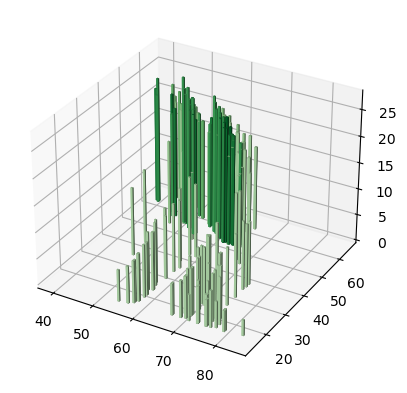

In [39]:
# %matplotlib notebook 
%matplotlib inline 
plt.rcdefaults()

width_bar = 0.5

x = data_16["L1"]
y = data_16["L2"]
z = np.log2(data_16["n"])

norm = plt.Normalize((data_16["GFlops"]/np.log10(max(data_16["GFlops"]))).min(), (data_16["GFlops"]/np.log10(max(data_16["GFlops"]))).max())
colours = cmap_16(norm(data_16["GFlops"]/np.log10(max(data_16["GFlops"]))))

ax = plt.subplot(projection="3d")
ax.bar3d(x, y, np.zeros_like(z), dx=width_bar, dy=width_bar, dz=z, 
         color=colours, 
         )
plt.show()


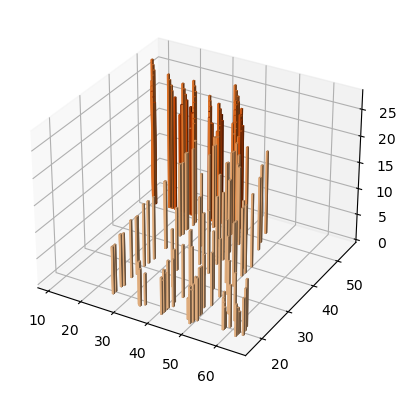

In [40]:
# %matplotlib notebook 

x = data_32["L1"]
y = data_32["L2"]
z = np.log2(data_32["n"])

norm = plt.Normalize((data_32["GFlops"]/np.log10(max(data_32["GFlops"]))).min(), (data_32["GFlops"]/np.log10(max(data_32["GFlops"]))).max())
colours = cmap_32(norm(data_32["GFlops"]/np.log10(max(data_32["GFlops"]))))

ax = plt.subplot(projection="3d")
ax.bar3d(x, y, np.zeros_like(z), dx=width_bar, dy=width_bar, dz=z, 
         color=colours, 
         )
plt.show()

ax.azim -60
ax.elev 30


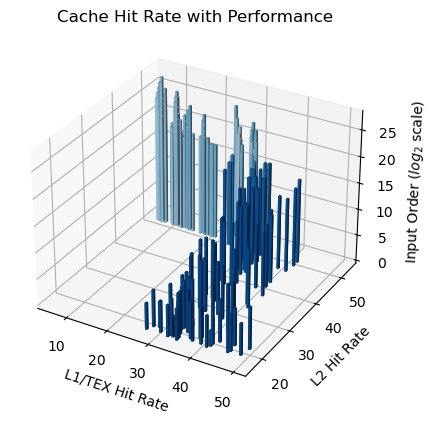

In [41]:
# %matplotlib notebook 

x = data_64["L1"]
y = data_64["L2"]
z = np.log2(data_64["n"])

norm = plt.Normalize((data_64["GFlops"]/np.log10(max(data_64["GFlops"]))).min(), (data_64["GFlops"]/np.log10(max(data_64["GFlops"]))).max())
colours = cmap_64(norm(data_64["GFlops"]/np.log10(max(data_64["GFlops"]))))

ax = plt.subplot(projection="3d")
ax.bar3d(x, y, np.zeros_like(z), dx=width_bar, dy=width_bar, dz=z, 
         color=colours, 
         )

ax.set_title("Cache Hit Rate with Performance")
ax.set_xlabel("L1/TEX Hit Rate")
ax.set_ylabel("L2 Hit Rate")
ax.set_zlabel("Input Order ($log_2$ scale)")

print('ax.azim {}'.format(ax.azim))
print('ax.elev {}'.format(ax.elev))

# for angle in range(-175, -120, 3):
#     ax.view_init(30, angle)
#     filename = "./3d/" + str(angle) + ".png"
#     plt.savefig(filename)
#     print("Save " + filename + " finish")
plt.show()